Team:

HommesBoiz

Members:

Alief Rizky Ramadhan

Muhammad Fariz Gumai

M. Afif Alfaro Adiyoso

Rahman Fitra Perdana

In [1]:
import pandas as pd
import numpy as np
import time
import datetime

import f_pkg

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML, Markdown

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Checking used library version
f_pkg.pkg_version()

 Package version check
numpy: 1.18.5
pandas: 1.0.5
sklearn: 0.23.1
matplotlib: 3.2.2
seaborn: 0.10.1
scipy: 1.5.0
xgboost: 1.2.1
category_encoders : 2.2.2



In [3]:
desc = pd.read_csv('data_description.csv')
subs = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')

pd.options.display.max_colwidth = 150
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
desc

,Kolom,Keterangan
0,job_level,Level Jabatan Pekerja
1,job_duration_in_current_job_level,Masa Kerja pada job level saat ini
2,person_level,Level personal Pekerja
3,job_duration_in_current_person_level,Masa Kerja pada person level saat ini
4,job_duration_in_current_branch,Masa Kerja pada unit kerja saat ini
5,Employee_type,"Tipe Pekerja ( 3 tipe Relationship Manager, tipe A, B , dan C)"
6,gender,Jenis Kelamin
7,age,Usia
8,marital_status_maried(Y/N),Status Pernikahan (Y / N)
9,number_of_dependences,Jumlah anak dalam tanggungan


In [5]:
#Running DataFrame optimizer to reduce memory usage
from f_pkg.function import optimizer
df = optimizer(df)

Memory usage of dataframe is: 1.87 MB
Memory usage after optimization is: 0.82 MB
Decreased by 56.2%


In [6]:
#Remove rows with duplicated index
df=df[~df.index.duplicated(keep='first')]

In [7]:
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Number of rows: 11153
Number of columns: 22


In [8]:
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.353,PG03,1.353,1.732,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.370,0.000,0
1,JG04,1.292,PG03,1.292,1.039,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.680,0.000,0
2,JG05,2.565,PG06,2.309,1.780,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.730,0.000,0
3,JG05,2.828,PG06,1.000,1.386,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.420,0.000,1
4,JG05,2.828,PG06,2.828,0.707,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.180,0.000,0


In [9]:
col_target = 'Best Performance'

cols_pred = list(df.drop(col_target,axis=1).columns)

cols_pred_num = list(df[cols_pred].select_dtypes(include=np.number).columns)
cols_pred_cat = list(df[cols_pred].select_dtypes(include=np.object).columns)

print('List of numerical predictors:', len(cols_pred_num),'\n\n', df[cols_pred_num].dtypes)
print('\nList of categorical predictors: ', len(cols_pred_cat), '\n\n', df[cols_pred_cat].dtypes)

List of numerical predictors: 16 

 job_duration_in_current_job_level        float32
job_duration_in_current_person_level     float32
job_duration_in_current_branch           float32
gender                                     uint8
age                                       uint16
number_of_dependences                      uint8
GPA                                      float32
year_graduated                            uint16
job_duration_from_training                 uint8
branch_rotation                            uint8
job_rotation                               uint8
assign_of_otherposition                    uint8
annual leave                               uint8
sick_leaves                                uint8
Last_achievement_%                       float32
Achievement_above_100%_during3quartal    float32
dtype: object

List of categorical predictors:  5 

 job_level                     object
person_level                  object
Employee_type                 object
marital_status_m

In [10]:
cols_pred_num

['job_duration_in_current_job_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
 'gender',
 'age',
 'number_of_dependences',
 'GPA',
 'year_graduated',
 'job_duration_from_training',
 'branch_rotation',
 'job_rotation',
 'assign_of_otherposition',
 'annual leave',
 'sick_leaves',
 'Last_achievement_%',
 'Achievement_above_100%_during3quartal']

In [11]:
cols_pred_cat_or = [
    'number_of_dependences',
    'branch_rotation',
    'job_rotation',
    'assign_of_otherposition',
    'annual leave',
    'sick_leaves',
    'Achievement_above_100%_during3quartal'
]

cols_pred_num_1 = [
    'job_duration_in_current_job_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
    'job_duration_from_training',
    'age',
    'GPA',
    'year_graduated',
    'Last_achievement_%'
]

cols_pred_cat_non = [
    'job_level',
    'person_level',
    'Employee_type',
    'Education_level',
]

cols_pred_cat_2 = [
    'gender',
    "marital_status_maried(Y/N)"
]

## EDA

In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
job_level,11153,3,JG04,10413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_duration_in_current_job_level,11153.000,NaN,NaN,NaN,1.433,0.431,0.000,1.225,1.353,1.414,2.958
person_level,11153,8,PG03,9655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_duration_in_current_person_level,11153.000,NaN,NaN,NaN,1.349,0.325,0.000,1.225,1.353,1.386,2.828
job_duration_in_current_branch,11153.000,NaN,NaN,NaN,1.035,0.417,0.000,0.707,1.118,1.225,2.678
Employee_type,11153,3,RM_type_A,7287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,11153.000,NaN,NaN,NaN,1.736,0.441,1.000,1.000,2.000,2.000,2.000
age,11153.000,NaN,NaN,NaN,1985.837,4.632,1963.000,1985.000,1987.000,1989.000,1997.000
marital_status_maried(Y/N),11153,2,Y,9501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_dependences,11153.000,NaN,NaN,NaN,0.996,0.881,0.000,0.000,1.000,2.000,7.000


### Missing Value Check

In [13]:
# Investigate columns with null values
missingCol = df.isnull().sum()
print("There are", len(missingCol[missingCol != 0]),"columns with missing value")

There are 2 columns with missing value


In [14]:
# Investigate null rate of contained null columns
missingRate = []
for col in cols_pred:
    if df[col].isnull().any():
        missingRate.append({'Predictor' : col,
                       'Missing rate' : df[col].isnull().sum() / df.shape[0]})
pd.DataFrame(missingRate).set_index('Predictor').sort_values('Missing rate',ascending=False)

,Missing rate
Predictor,
Last_achievement_%,0.000
Achievement_above_100%_during3quartal,0.000


### Outlier Check

job_duration_in_current_job_level 's outliers count: 1295


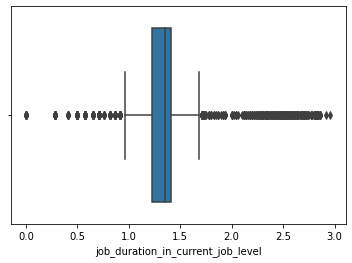

job_duration_in_current_person_level 's outliers count: 1666


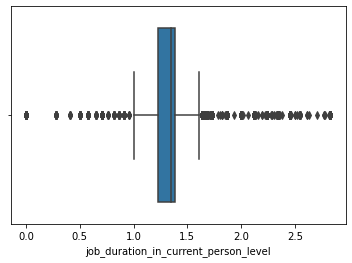

job_duration_in_current_branch 's outliers count: 76


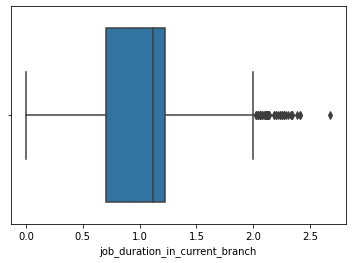

age 's outliers count: 756


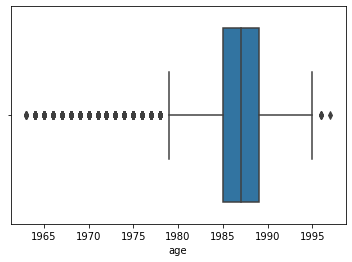

number_of_dependences 's outliers count: 1


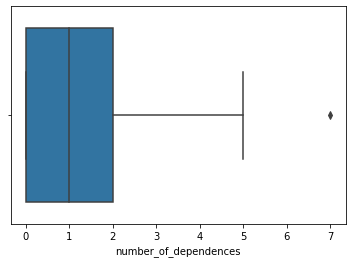

GPA 's outliers count: 2210


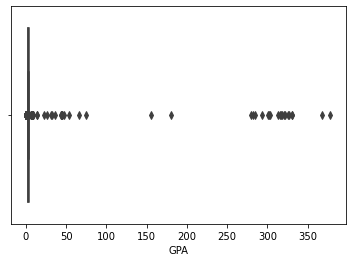

year_graduated 's outliers count: 492


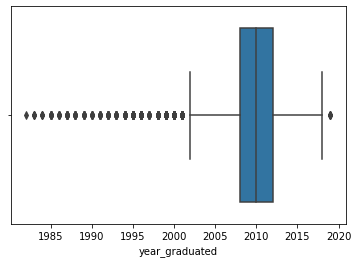

job_duration_from_training 's outliers count: 1268


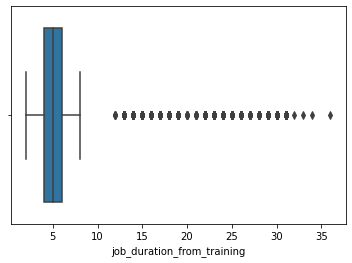

branch_rotation 's outliers count: 984


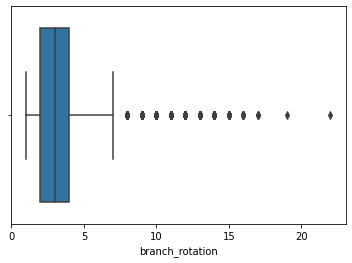

job_rotation 's outliers count: 641


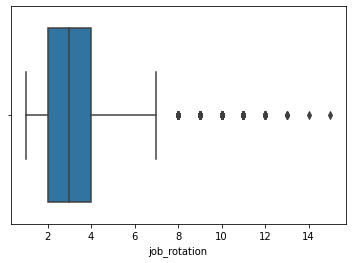

assign_of_otherposition 's outliers count: 1781


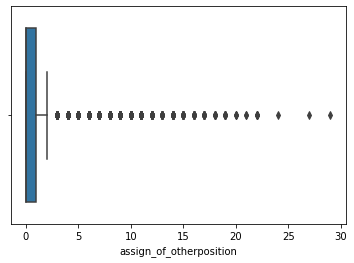

annual leave 's outliers count: 348


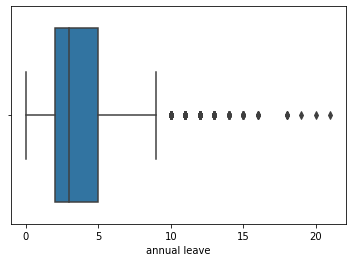

sick_leaves 's outliers count: 1503


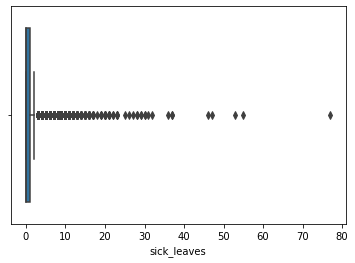

Last_achievement_% 's outliers count: 3


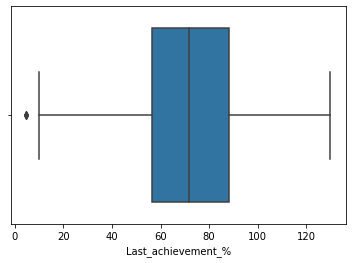

Achievement_above_100%_during3quartal 's outliers count: 1604


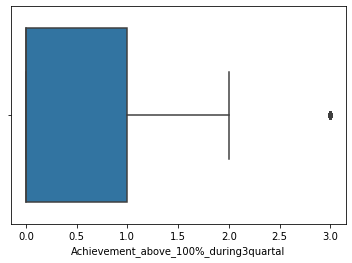

['job_duration_in_current_job_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
 'age',
 'number_of_dependences',
 'GPA',
 'year_graduated',
 'job_duration_from_training',
 'branch_rotation',
 'job_rotation',
 'assign_of_otherposition',
 'annual leave',
 'sick_leaves',
 'Last_achievement_%',
 'Achievement_above_100%_during3quartal']

In [15]:
from f_pkg.function import cnt_outliers, replace_with_thresholds

# Check number of 1.5 IQR based outlier
cnt_outliers(df,cols_pred_num,plot=True)

***

### job_level

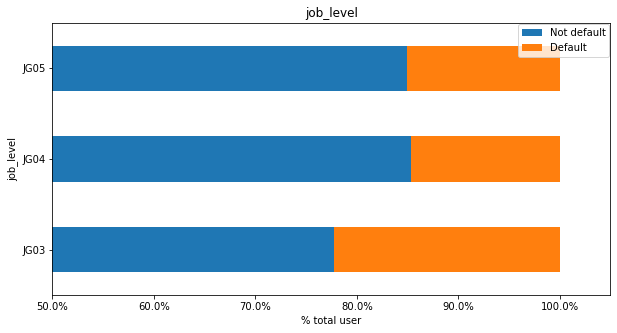

***

### person_level

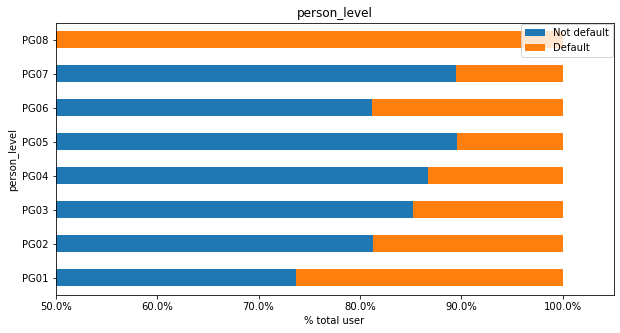

***

### Employee_type

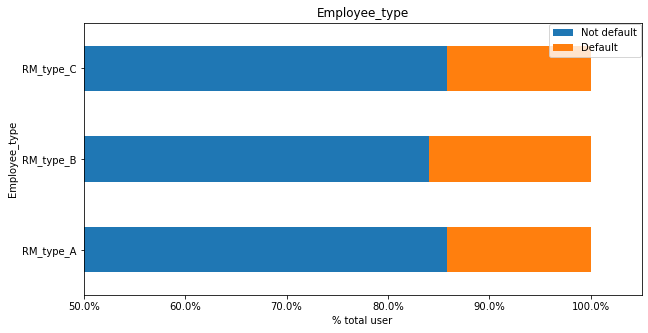

***

### marital_status_maried(Y/N)

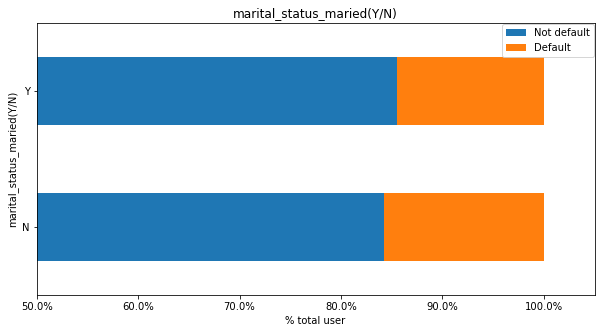

***

### Education_level

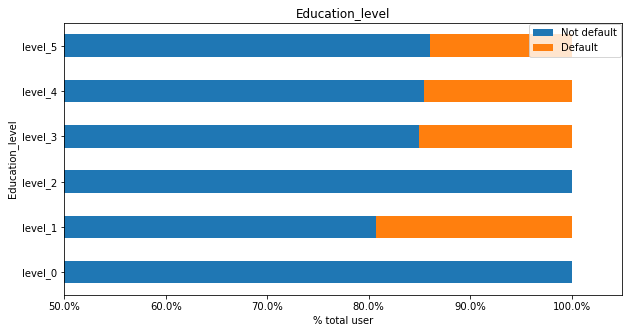

In [16]:
from f_pkg.plots import stacked_plot, dist_plot
stacked_plot(df,
            cat_columns=cols_pred_cat,
            col_target=col_target)

***

### job_duration_in_current_job_level

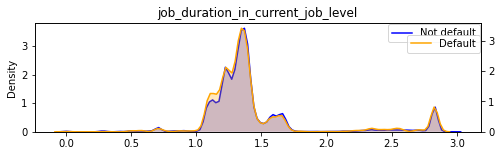

***

### job_duration_in_current_person_level

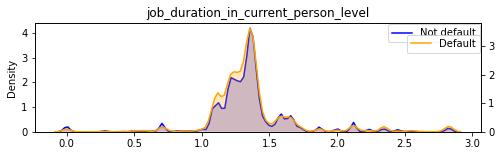

***

### job_duration_in_current_branch

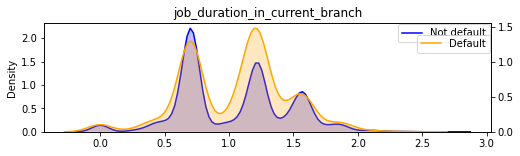

***

### gender

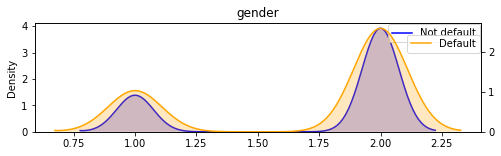

***

### age

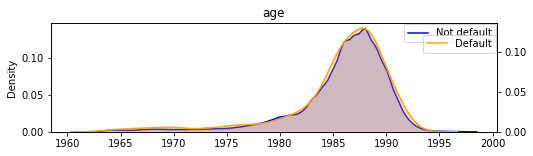

***

### number_of_dependences

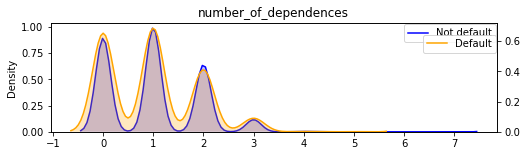

***

### GPA

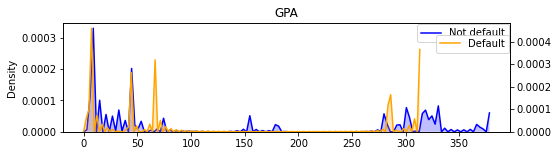

***

### year_graduated

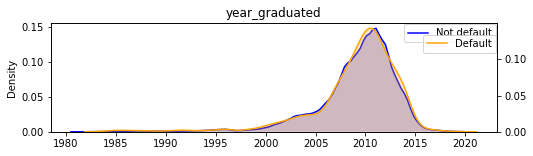

***

### job_duration_from_training

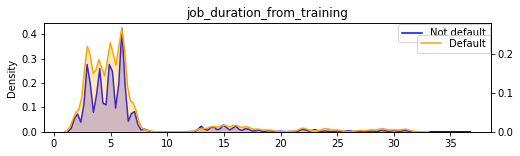

***

### branch_rotation

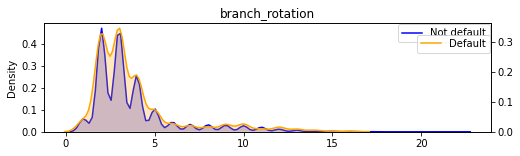

***

### job_rotation

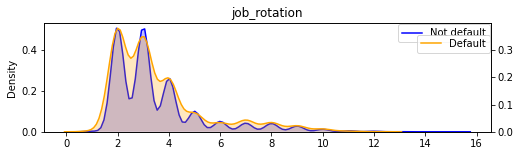

***

### assign_of_otherposition

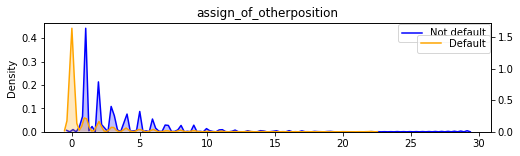

***

### annual leave

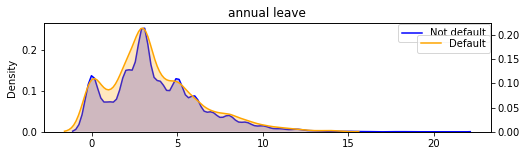

***

### sick_leaves

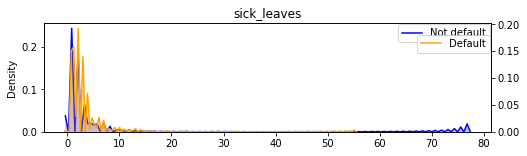

***

### Last_achievement_%

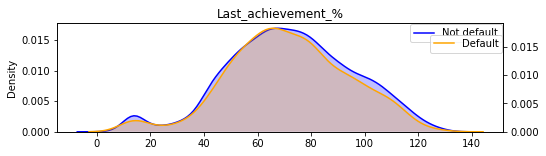

***

### Achievement_above_100%_during3quartal

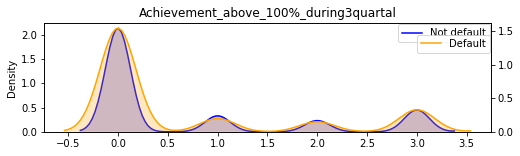

In [17]:
dist_plot(df,
            columns=cols_pred_num,
            col_target=col_target)

## Data Split

In [18]:
from f_pkg.function import data_split
df['data_type'] = data_split(df,
                               sample_sizes=[0.8,0.1,0.1],
                               sample_names=['train','test','valid'],
                               seed=42)

train    8922
valid    1116
test     1115
dtype: int64


In [19]:
#masked the sample name
train_mask = (df['data_type'] == 'train')
valid_mask = (df['data_type'] == 'valid')
test_mask = (df['data_type'] == 'test')

In [20]:
data_summary = df.groupby(['data_type']).aggregate({col_target:['sum','count']})
data_summary.columns = [col_target, 'rows']
data_summary[col_target+' rate'] = data_summary[col_target] / data_summary['rows']

display(data_summary)

,Best Performance,rows,Best Performance rate
data_type,,,
test,182.000,1115,0.163
train,1284.000,8922,0.144
valid,171.000,1116,0.153


# WoE Encoder

WoE method chose to transform the string-type categorical predictor to be in numeric form, WoE estimated the weight of each predictor's unique value for their ability to separate the target(in this case Default/not default).

WoE is also flexible with the null value as we can cluster it into 'special segment'. So the imputation would not be needed in this case.

In [21]:
from f_pkg.function import woe_transform
#fit and transform WoE on categorical predictor
data_woe = woe_transform(df,
                         mask=train_mask,
                         cat_columns=cols_pred_cat_non,
                         col_target=col_target)

In [22]:
#Stored the WoE output on cols_woe
data_woe.columns = [i + '_woe' for i in data_woe.columns]
cols_woe = list(data_woe.columns)

df[cols_woe] = data_woe

In [23]:
cols_woe

['job_level_woe',
 'person_level_woe',
 'Employee_type_woe',
 'Education_level_woe']

In [24]:
woe_change = []
#Listed the tranformation result on each unique value on categorical predictor
for col,col_woe in zip(cols_pred_cat_non,cols_woe):
    woe_change.append(df[[col,col_woe,col_target]].fillna('Null').groupby([col,col_woe]).agg(
        {col_woe: ['count'],
         col_target : ['sum','mean']}))

for i in range(len(woe_change)):
    woe_change[i]
woe_change[0].columns = [('branch_code_woe count'),
            (   'default_flag count'),
            (   'default_flag rate')]
pd.DataFrame(woe_change[0])

,,branch_code_woe count,default_flag count,default_flag rate
job_level,job_level_woe,,,
JG03,0.550,36,8.000,0.222
JG04,-0.004,10413,1523.000,0.146
JG05,0.033,704,106.000,0.151


## Missing Value - Numerical Predictor

Missing value imputation is done by filling the mean value to each predictor

In [25]:
cols_pred_cat_or

['number_of_dependences',
 'branch_rotation',
 'job_rotation',
 'assign_of_otherposition',
 'annual leave',
 'sick_leaves',
 'Achievement_above_100%_during3quartal']

In [26]:
cols_num_missing = df[cols_pred_num_1].columns[df[cols_pred_num_1].isnull().any()].tolist()
cols_num_missing1 = df[cols_pred_cat_or].columns[df[cols_pred_cat_or].isnull().any()].tolist()
#filling the missing value with mean
for c in cols_num_missing:
    mean = df[c].mean()
    df[c+'_imp'] = df[c].fillna(mean,axis=0)
    
for i in cols_num_missing1:
    mean = df[i].mean()
    df[i+'_imp'] = df[i].fillna(mean,axis=0)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11153 entries, 0 to 11152
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   job_level                                  11153 non-null  object 
 1   job_duration_in_current_job_level          11153 non-null  float32
 2   person_level                               11153 non-null  object 
 3   job_duration_in_current_person_level       11153 non-null  float32
 4   job_duration_in_current_branch             11153 non-null  float32
 5   Employee_type                              11153 non-null  object 
 6   gender                                     11153 non-null  uint8  
 7   age                                        11153 non-null  uint16 
 8   marital_status_maried(Y/N)                 11153 non-null  object 
 9   number_of_dependences                      11153 non-null  uint8  
 10  Education_level       

In [28]:
data = df.copy()

In [29]:
data['data_type'].replace({'test':'valid'},inplace=True)

In [30]:
data['gender'].replace({1:0,2:1},inplace=True)

In [31]:
data['marital_status_maried(Y/N)'].replace({'Y':1,'N':0},inplace=True)

In [32]:
train_mask = (data['data_type'] == 'train')
valid_mask = (data['data_type'] == 'valid')

# Xtreme Gradient Boosting

## =========================================

In [33]:
cols_pred_xgb = ['job_duration_in_current_job_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
    'marital_status_maried(Y/N)',
 'gender',
 'age',
 'number_of_dependences',
 'GPA',
 'year_graduated',
 'job_duration_from_training',
 'branch_rotation',
 'job_rotation',
 'assign_of_otherposition',
 'annual leave',
 'sick_leaves',
 'Last_achievement_%_imp',
 'Achievement_above_100%_during3quartal_imp']

In [34]:
pred_xgb = cols_pred_xgb + cols_woe

### First I am gonna find the best parameter using all predictor

In [35]:
from f_pkg.metrics import gini

import xgboost as xgb

dt_xgb = data[pred_xgb]

col_result = ['eta', 'max_depth','childweight','subsample', 'gini_train', 'gini_valid', 'difference']
result = pd.DataFrame(columns = col_result)
grid_params = {
            'eta' : [0.1,0.2,0.3],
            'max_depth' : [2,3,4],
              'min_child_weight' : [10,20,30,40,50],
              'subsample' : [0.4,0.5, 0.6, 0.7,0.8,0.9]      
}

flag = False

for eta in grid_params['eta']:
    for max_depth in grid_params['max_depth']:
        for childweight in grid_params['min_child_weight']:
            for ssample in grid_params['subsample']:
                xgb_params = {'eta': eta,
                                    'max_depth': max_depth,
                                    'objective': 'binary:logistic',
                                    'eval_metric': 'auc',
                                    'min_child_weight': childweight,
                                    'subsample': ssample}

                evals_result = {}

                tbooster = xgb.train(params = xgb_params,
                                            dtrain = xgb.DMatrix(dt_xgb[train_mask],data[train_mask][col_target]),
                                            num_boost_round = 200,
                                            early_stopping_rounds = 20,
                                            evals = ((xgb.DMatrix(dt_xgb[train_mask],data[train_mask][col_target]),'train'),
                                                     (xgb.DMatrix(dt_xgb[valid_mask],data[valid_mask][col_target]),'valid')
                                                    ), 
                                            evals_result = evals_result,)

                txgb_scored = tbooster.predict(xgb.DMatrix(dt_xgb), ntree_limit=tbooster.best_ntree_limit)
                gini_train = gini(data[train_mask][col_target], txgb_scored[train_mask])
                gini_valid = gini(data[valid_mask][col_target], txgb_scored[valid_mask])
                added = [eta, max_depth, childweight,ssample, gini_train, gini_valid, (abs(gini_train-gini_valid))]
                if flag == False:
                    result = pd.DataFrame([added], columns = col_result)
                    flag = True
                else:
                    result = pd.concat([result, pd.DataFrame([added], columns = col_result)], axis=0)

[0]	train-auc:0.54655	valid-auc:0.54116
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.55849	valid-auc:0.54897
[2]	train-auc:0.56556	valid-auc:0.55508
[3]	train-auc:0.57131	valid-auc:0.55947
[4]	train-auc:0.57950	valid-auc:0.55903
[5]	train-auc:0.58479	valid-auc:0.57307
[6]	train-auc:0.58446	valid-auc:0.56966
[7]	train-auc:0.58452	valid-auc:0.56606
[8]	train-auc:0.58611	valid-auc:0.57029
[9]	train-auc:0.58637	valid-auc:0.56056
[10]	train-auc:0.59676	valid-auc:0.56566
[11]	train-auc:0.60058	valid-auc:0.56390
[12]	train-auc:0.60554	valid-auc:0.56714
[13]	train-auc:0.60891	valid-auc:0.56532
[14]	train-auc:0.61066	valid-auc:0.56688
[15]	train-auc:0.61005	valid-auc:0.57271
[16]	train-auc:0.61183	valid-auc:0.57209
[17]	train-auc:0.61071	valid-auc:0.57667
[18]	train-auc:0.61628	valid-auc:0.57486
[19]	train-auc:0.61661	valid-auc:0.57533
[20]	train-auc:0.61793	valid-auc:0.57527
[21]	t

[36]	train-auc:0.62813	valid-auc:0.57825
[37]	train-auc:0.62857	valid-auc:0.57574
[38]	train-auc:0.63002	valid-auc:0.57471
[39]	train-auc:0.63210	valid-auc:0.57582
[40]	train-auc:0.63261	valid-auc:0.57554
[41]	train-auc:0.63340	valid-auc:0.57653
[42]	train-auc:0.63430	valid-auc:0.57715
[43]	train-auc:0.63356	valid-auc:0.57748
[44]	train-auc:0.63397	valid-auc:0.57715
[45]	train-auc:0.63450	valid-auc:0.57517
[46]	train-auc:0.63539	valid-auc:0.57393
[47]	train-auc:0.63541	valid-auc:0.57403
[48]	train-auc:0.63577	valid-auc:0.57531
[49]	train-auc:0.63656	valid-auc:0.57410
[50]	train-auc:0.63745	valid-auc:0.57435
[51]	train-auc:0.63793	valid-auc:0.57449
[52]	train-auc:0.63817	valid-auc:0.57417
Stopping. Best iteration:
[32]	train-auc:0.62303	valid-auc:0.58058

[0]	train-auc:0.55649	valid-auc:0.55186
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56986	valid-auc:0.55077
[2]	train-au

[2]	train-auc:0.57144	valid-auc:0.55599
[3]	train-auc:0.57492	valid-auc:0.55569
[4]	train-auc:0.58430	valid-auc:0.57083
[5]	train-auc:0.58615	valid-auc:0.58068
[6]	train-auc:0.59058	valid-auc:0.57679
[7]	train-auc:0.59130	valid-auc:0.57256
[8]	train-auc:0.59145	valid-auc:0.57376
[9]	train-auc:0.59062	valid-auc:0.57409
[10]	train-auc:0.59436	valid-auc:0.56809
[11]	train-auc:0.59833	valid-auc:0.56738
[12]	train-auc:0.59834	valid-auc:0.56823
[13]	train-auc:0.60035	valid-auc:0.56581
[14]	train-auc:0.60178	valid-auc:0.56834
[15]	train-auc:0.60430	valid-auc:0.56814
[16]	train-auc:0.60572	valid-auc:0.57103
[17]	train-auc:0.60537	valid-auc:0.57102
[18]	train-auc:0.60722	valid-auc:0.57151
[19]	train-auc:0.60893	valid-auc:0.57098
[20]	train-auc:0.61250	valid-auc:0.57147
[21]	train-auc:0.61359	valid-auc:0.57024
[22]	train-auc:0.61386	valid-auc:0.56932
[23]	train-auc:0.61581	valid-auc:0.57134
[24]	train-auc:0.61601	valid-auc:0.57112
[25]	train-auc:0.61430	valid-auc:0.57394
Stopping. Best iteration

[27]	train-auc:0.60881	valid-auc:0.57976
[28]	train-auc:0.60920	valid-auc:0.57803
[29]	train-auc:0.60993	valid-auc:0.57800
[30]	train-auc:0.61053	valid-auc:0.57903
[31]	train-auc:0.61202	valid-auc:0.57920
[32]	train-auc:0.61148	valid-auc:0.58130
[33]	train-auc:0.61190	valid-auc:0.57969
[34]	train-auc:0.61268	valid-auc:0.57865
[35]	train-auc:0.61385	valid-auc:0.57747
[36]	train-auc:0.61284	valid-auc:0.57822
[37]	train-auc:0.61333	valid-auc:0.58083
[38]	train-auc:0.61356	valid-auc:0.57952
[39]	train-auc:0.61521	valid-auc:0.57851
[40]	train-auc:0.61597	valid-auc:0.57901
[41]	train-auc:0.61619	valid-auc:0.58055
[42]	train-auc:0.61873	valid-auc:0.58015
[43]	train-auc:0.61967	valid-auc:0.57951
Stopping. Best iteration:
[23]	train-auc:0.61116	valid-auc:0.58556

[0]	train-auc:0.53851	valid-auc:0.53258
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56372	valid-auc:0.54933
[2]	train-au

[0]	train-auc:0.55649	valid-auc:0.55186
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56872	valid-auc:0.55621
[2]	train-auc:0.56876	valid-auc:0.55668
[3]	train-auc:0.57247	valid-auc:0.55713
[4]	train-auc:0.57671	valid-auc:0.55953
[5]	train-auc:0.57675	valid-auc:0.56031
[6]	train-auc:0.58552	valid-auc:0.56496
[7]	train-auc:0.58631	valid-auc:0.56287
[8]	train-auc:0.58947	valid-auc:0.57430
[9]	train-auc:0.59126	valid-auc:0.57969
[10]	train-auc:0.59344	valid-auc:0.57626
[11]	train-auc:0.59259	valid-auc:0.57588
[12]	train-auc:0.59412	valid-auc:0.57888
[13]	train-auc:0.59461	valid-auc:0.57950
[14]	train-auc:0.59623	valid-auc:0.57974
[15]	train-auc:0.59838	valid-auc:0.58114
[16]	train-auc:0.59882	valid-auc:0.58142
[17]	train-auc:0.59968	valid-auc:0.58050
[18]	train-auc:0.60135	valid-auc:0.58034
[19]	train-auc:0.60144	valid-auc:0.58038
[20]	train-auc:0.60228	valid-auc:0.58236
[21]	t

[24]	train-auc:0.61140	valid-auc:0.56958
[25]	train-auc:0.61166	valid-auc:0.57224
[26]	train-auc:0.61233	valid-auc:0.57157
Stopping. Best iteration:
[6]	train-auc:0.59249	valid-auc:0.57671

[0]	train-auc:0.55649	valid-auc:0.55186
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56986	valid-auc:0.55077
[2]	train-auc:0.57007	valid-auc:0.55323
[3]	train-auc:0.57038	valid-auc:0.55441
[4]	train-auc:0.57750	valid-auc:0.56095
[5]	train-auc:0.57628	valid-auc:0.56133
[6]	train-auc:0.58436	valid-auc:0.56403
[7]	train-auc:0.58881	valid-auc:0.57254
[8]	train-auc:0.59179	valid-auc:0.57221
[9]	train-auc:0.59098	valid-auc:0.57068
[10]	train-auc:0.59325	valid-auc:0.57383
[11]	train-auc:0.59980	valid-auc:0.57323
[12]	train-auc:0.59984	valid-auc:0.57322
[13]	train-auc:0.59960	valid-auc:0.57352
[14]	train-auc:0.59946	valid-auc:0.57325
[15]	train-auc:0.60068	valid-auc:0.57289
[16]	train-auc:0.6007

[23]	train-auc:0.61126	valid-auc:0.56688
[24]	train-auc:0.61159	valid-auc:0.57053
[25]	train-auc:0.60956	valid-auc:0.57156
[26]	train-auc:0.61131	valid-auc:0.57095
Stopping. Best iteration:
[6]	train-auc:0.59127	valid-auc:0.57607

[0]	train-auc:0.56034	valid-auc:0.54760
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56861	valid-auc:0.54883
[2]	train-auc:0.57873	valid-auc:0.56440
[3]	train-auc:0.58286	valid-auc:0.56897
[4]	train-auc:0.58805	valid-auc:0.57413
[5]	train-auc:0.58819	valid-auc:0.57348
[6]	train-auc:0.59249	valid-auc:0.57671
[7]	train-auc:0.59243	valid-auc:0.57357
[8]	train-auc:0.59430	valid-auc:0.56965
[9]	train-auc:0.59305	valid-auc:0.56886
[10]	train-auc:0.59883	valid-auc:0.56872
[11]	train-auc:0.60605	valid-auc:0.56678
[12]	train-auc:0.60554	valid-auc:0.56595
[13]	train-auc:0.60625	valid-auc:0.57046
[14]	train-auc:0.60400	valid-auc:0.57005
[15]	train-auc:0.6076

[32]	train-auc:0.64340	valid-auc:0.58087
[33]	train-auc:0.64373	valid-auc:0.58103
[34]	train-auc:0.64630	valid-auc:0.58145
[35]	train-auc:0.64691	valid-auc:0.58113
[36]	train-auc:0.64724	valid-auc:0.58020
[37]	train-auc:0.64810	valid-auc:0.57784
[38]	train-auc:0.64943	valid-auc:0.57510
[39]	train-auc:0.65099	valid-auc:0.57522
[40]	train-auc:0.65127	valid-auc:0.57533
[41]	train-auc:0.65192	valid-auc:0.57504
[42]	train-auc:0.65276	valid-auc:0.57255
[43]	train-auc:0.65451	valid-auc:0.57195
Stopping. Best iteration:
[23]	train-auc:0.63436	valid-auc:0.58670

[0]	train-auc:0.58532	valid-auc:0.57187
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.59022	valid-auc:0.55926
[2]	train-auc:0.59579	valid-auc:0.55899
[3]	train-auc:0.60145	valid-auc:0.56570
[4]	train-auc:0.61096	valid-auc:0.56497
[5]	train-auc:0.60877	valid-auc:0.56862
[6]	train-auc:0.61517	valid-auc:0.56756
[7]	train-auc:0.6

[19]	train-auc:0.63418	valid-auc:0.58291
[20]	train-auc:0.63829	valid-auc:0.58069
[21]	train-auc:0.63870	valid-auc:0.58239
[22]	train-auc:0.64277	valid-auc:0.58039
[23]	train-auc:0.64362	valid-auc:0.57824
[24]	train-auc:0.64357	valid-auc:0.57866
[25]	train-auc:0.64416	valid-auc:0.57837
[26]	train-auc:0.64866	valid-auc:0.58324
[27]	train-auc:0.65364	valid-auc:0.58317
[28]	train-auc:0.65572	valid-auc:0.58181
[29]	train-auc:0.65633	valid-auc:0.58055
[30]	train-auc:0.65780	valid-auc:0.58249
[31]	train-auc:0.65889	valid-auc:0.58238
[32]	train-auc:0.66064	valid-auc:0.57900
[33]	train-auc:0.66410	valid-auc:0.57526
[34]	train-auc:0.66533	valid-auc:0.57646
[35]	train-auc:0.66510	valid-auc:0.57898
[36]	train-auc:0.66636	valid-auc:0.57927
[37]	train-auc:0.66802	valid-auc:0.57995
[38]	train-auc:0.67087	valid-auc:0.57853
Stopping. Best iteration:
[18]	train-auc:0.63012	valid-auc:0.58369

[0]	train-auc:0.55776	valid-auc:0.54001
Multiple eval metrics have been passed: 'valid-auc' will be used for ear

[21]	train-auc:0.63550	valid-auc:0.57723
[22]	train-auc:0.63698	valid-auc:0.57673
[23]	train-auc:0.64002	valid-auc:0.57667
[24]	train-auc:0.63923	valid-auc:0.57757
Stopping. Best iteration:
[4]	train-auc:0.59631	valid-auc:0.58376

[0]	train-auc:0.58781	valid-auc:0.57733
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.59102	valid-auc:0.57597
[2]	train-auc:0.59602	valid-auc:0.58107
[3]	train-auc:0.59754	valid-auc:0.58346
[4]	train-auc:0.60091	valid-auc:0.58621
[5]	train-auc:0.60550	valid-auc:0.58011
[6]	train-auc:0.60482	valid-auc:0.57884
[7]	train-auc:0.60763	valid-auc:0.57986
[8]	train-auc:0.60867	valid-auc:0.57817
[9]	train-auc:0.60718	valid-auc:0.57917
[10]	train-auc:0.61176	valid-auc:0.58042
[11]	train-auc:0.61167	valid-auc:0.57969
[12]	train-auc:0.61452	valid-auc:0.57658
[13]	train-auc:0.61410	valid-auc:0.58006
[14]	train-auc:0.61438	valid-auc:0.58027
[15]	train-auc:0.6173

[8]	train-auc:0.60906	valid-auc:0.57511
[9]	train-auc:0.60764	valid-auc:0.57640
[10]	train-auc:0.60985	valid-auc:0.57502
[11]	train-auc:0.61755	valid-auc:0.57402
[12]	train-auc:0.61825	valid-auc:0.57439
[13]	train-auc:0.61894	valid-auc:0.57425
[14]	train-auc:0.62056	valid-auc:0.57568
[15]	train-auc:0.62343	valid-auc:0.57516
[16]	train-auc:0.62461	valid-auc:0.57344
[17]	train-auc:0.63081	valid-auc:0.57297
[18]	train-auc:0.63031	valid-auc:0.57516
[19]	train-auc:0.63014	valid-auc:0.57639
[20]	train-auc:0.63329	valid-auc:0.57599
[21]	train-auc:0.63575	valid-auc:0.57147
[22]	train-auc:0.63590	valid-auc:0.57118
[23]	train-auc:0.63904	valid-auc:0.57043
Stopping. Best iteration:
[3]	train-auc:0.59503	valid-auc:0.58326

[0]	train-auc:0.58769	valid-auc:0.57744
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.58999	valid-auc:0.57523
[2]	train-auc:0.59336	valid-auc:0.57880
[3]	train-auc:0.

[37]	train-auc:0.64790	valid-auc:0.56388
[38]	train-auc:0.64934	valid-auc:0.56320
[39]	train-auc:0.65053	valid-auc:0.56413
[40]	train-auc:0.65147	valid-auc:0.56478
[41]	train-auc:0.65192	valid-auc:0.56512
[42]	train-auc:0.65179	valid-auc:0.56689
[43]	train-auc:0.65220	valid-auc:0.56896
[44]	train-auc:0.65287	valid-auc:0.56896
[45]	train-auc:0.65404	valid-auc:0.56834
[46]	train-auc:0.65379	valid-auc:0.56753
Stopping. Best iteration:
[26]	train-auc:0.63890	valid-auc:0.57490

[0]	train-auc:0.58694	valid-auc:0.57617
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.59090	valid-auc:0.57576
[2]	train-auc:0.59196	valid-auc:0.57596
[3]	train-auc:0.59293	valid-auc:0.57766
[4]	train-auc:0.60428	valid-auc:0.57464
[5]	train-auc:0.60048	valid-auc:0.57745
[6]	train-auc:0.60570	valid-auc:0.57586
[7]	train-auc:0.60645	valid-auc:0.57717
[8]	train-auc:0.60778	valid-auc:0.57504
[9]	train-auc:0.610

[0]	train-auc:0.58641	valid-auc:0.57019
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.58550	valid-auc:0.55358
[2]	train-auc:0.59664	valid-auc:0.55953
[3]	train-auc:0.60277	valid-auc:0.57000
[4]	train-auc:0.59895	valid-auc:0.57118
[5]	train-auc:0.60115	valid-auc:0.57028
[6]	train-auc:0.60551	valid-auc:0.56494
[7]	train-auc:0.60431	valid-auc:0.56842
[8]	train-auc:0.60972	valid-auc:0.56852
[9]	train-auc:0.61258	valid-auc:0.57075
[10]	train-auc:0.61788	valid-auc:0.57412
[11]	train-auc:0.62309	valid-auc:0.57364
[12]	train-auc:0.62404	valid-auc:0.57435
[13]	train-auc:0.62337	valid-auc:0.57807
[14]	train-auc:0.62502	valid-auc:0.57698
[15]	train-auc:0.62905	valid-auc:0.57450
[16]	train-auc:0.62835	valid-auc:0.57319
[17]	train-auc:0.62787	valid-auc:0.57046
[18]	train-auc:0.62751	valid-auc:0.57201
[19]	train-auc:0.62834	valid-auc:0.57410
[20]	train-auc:0.63131	valid-auc:0.57252
[21]	t

[29]	train-auc:0.67013	valid-auc:0.58080
[30]	train-auc:0.67302	valid-auc:0.58020
[31]	train-auc:0.67406	valid-auc:0.57823
[32]	train-auc:0.67609	valid-auc:0.57769
[33]	train-auc:0.67673	valid-auc:0.57748
[34]	train-auc:0.67878	valid-auc:0.57730
[35]	train-auc:0.68000	valid-auc:0.57488
[36]	train-auc:0.67999	valid-auc:0.57463
[37]	train-auc:0.68048	valid-auc:0.57227
[38]	train-auc:0.68071	valid-auc:0.56936
[39]	train-auc:0.68372	valid-auc:0.56988
[40]	train-auc:0.68372	valid-auc:0.56998
[41]	train-auc:0.68251	valid-auc:0.57032
[42]	train-auc:0.68395	valid-auc:0.56994
[43]	train-auc:0.68603	valid-auc:0.57079
[44]	train-auc:0.68791	valid-auc:0.57001
[45]	train-auc:0.68697	valid-auc:0.57212
[46]	train-auc:0.68824	valid-auc:0.57306
Stopping. Best iteration:
[26]	train-auc:0.66724	valid-auc:0.58679

[0]	train-auc:0.58880	valid-auc:0.55459
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-a

[0]	train-auc:0.57159	valid-auc:0.55508
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.58450	valid-auc:0.55505
[2]	train-auc:0.61025	valid-auc:0.56733
[3]	train-auc:0.61381	valid-auc:0.57025
[4]	train-auc:0.61474	valid-auc:0.57703
[5]	train-auc:0.61713	valid-auc:0.58946
[6]	train-auc:0.62725	valid-auc:0.58274
[7]	train-auc:0.62911	valid-auc:0.58435
[8]	train-auc:0.63280	valid-auc:0.58237
[9]	train-auc:0.63738	valid-auc:0.58011
[10]	train-auc:0.64210	valid-auc:0.57241
[11]	train-auc:0.64645	valid-auc:0.57320
[12]	train-auc:0.64895	valid-auc:0.57157
[13]	train-auc:0.65013	valid-auc:0.57172
[14]	train-auc:0.64790	valid-auc:0.57893
[15]	train-auc:0.64634	valid-auc:0.57908
[16]	train-auc:0.64783	valid-auc:0.57856
[17]	train-auc:0.64914	valid-auc:0.58250
[18]	train-auc:0.65121	valid-auc:0.58501
[19]	train-auc:0.65246	valid-auc:0.58511
[20]	train-auc:0.65440	valid-auc:0.57950
[21]	t

[34]	train-auc:0.68402	valid-auc:0.57949
[35]	train-auc:0.68423	valid-auc:0.58124
[36]	train-auc:0.68532	valid-auc:0.58144
[37]	train-auc:0.68706	valid-auc:0.57793
[38]	train-auc:0.68836	valid-auc:0.57810
[39]	train-auc:0.69008	valid-auc:0.57742
[40]	train-auc:0.69221	valid-auc:0.57609
Stopping. Best iteration:
[20]	train-auc:0.66104	valid-auc:0.58467

[0]	train-auc:0.59674	valid-auc:0.57274
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.60201	valid-auc:0.57203
[2]	train-auc:0.61032	valid-auc:0.57388
[3]	train-auc:0.61291	valid-auc:0.57770
[4]	train-auc:0.61923	valid-auc:0.58229
[5]	train-auc:0.61989	valid-auc:0.57490
[6]	train-auc:0.62445	valid-auc:0.56949
[7]	train-auc:0.62636	valid-auc:0.57339
[8]	train-auc:0.62844	valid-auc:0.58106
[9]	train-auc:0.63046	valid-auc:0.57930
[10]	train-auc:0.63348	valid-auc:0.58159
[11]	train-auc:0.63324	valid-auc:0.57716
[12]	train-auc:0.636

[3]	train-auc:0.61124	valid-auc:0.56943
[4]	train-auc:0.61225	valid-auc:0.56160
[5]	train-auc:0.61480	valid-auc:0.56558
[6]	train-auc:0.61940	valid-auc:0.56011
[7]	train-auc:0.62489	valid-auc:0.56695
[8]	train-auc:0.62493	valid-auc:0.56692
[9]	train-auc:0.62931	valid-auc:0.56892
[10]	train-auc:0.63529	valid-auc:0.57115
[11]	train-auc:0.64274	valid-auc:0.56930
[12]	train-auc:0.64341	valid-auc:0.57145
[13]	train-auc:0.64374	valid-auc:0.57224
[14]	train-auc:0.64561	valid-auc:0.57231
[15]	train-auc:0.64752	valid-auc:0.57189
[16]	train-auc:0.64860	valid-auc:0.57086
[17]	train-auc:0.65470	valid-auc:0.57136
[18]	train-auc:0.65526	valid-auc:0.57239
[19]	train-auc:0.65497	valid-auc:0.57232
[20]	train-auc:0.65854	valid-auc:0.57220
Stopping. Best iteration:
[0]	train-auc:0.59678	valid-auc:0.57462

[0]	train-auc:0.59703	valid-auc:0.57266
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.601

[0]	train-auc:0.59278	valid-auc:0.55359
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.60119	valid-auc:0.55798
[2]	train-auc:0.60791	valid-auc:0.56261
[3]	train-auc:0.61532	valid-auc:0.56506
[4]	train-auc:0.61646	valid-auc:0.56531
[5]	train-auc:0.61799	valid-auc:0.56502
[6]	train-auc:0.62450	valid-auc:0.56106
[7]	train-auc:0.62584	valid-auc:0.56384
[8]	train-auc:0.63345	valid-auc:0.56749
[9]	train-auc:0.63513	valid-auc:0.56938
[10]	train-auc:0.64078	valid-auc:0.56770
[11]	train-auc:0.64524	valid-auc:0.56622
[12]	train-auc:0.64476	valid-auc:0.56722
[13]	train-auc:0.64520	valid-auc:0.57108
[14]	train-auc:0.64702	valid-auc:0.57037
[15]	train-auc:0.65076	valid-auc:0.56773
[16]	train-auc:0.65255	valid-auc:0.56498
[17]	train-auc:0.65188	valid-auc:0.56567
[18]	train-auc:0.65079	valid-auc:0.56751
[19]	train-auc:0.65127	valid-auc:0.56730
[20]	train-auc:0.65461	valid-auc:0.56595
[21]	t

[34]	train-auc:0.64827	valid-auc:0.55693
[35]	train-auc:0.64929	valid-auc:0.55687
[36]	train-auc:0.65041	valid-auc:0.55634
[37]	train-auc:0.65032	valid-auc:0.55470
[38]	train-auc:0.64949	valid-auc:0.55611
Stopping. Best iteration:
[18]	train-auc:0.63608	valid-auc:0.56708

[0]	train-auc:0.58746	valid-auc:0.53646
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.60054	valid-auc:0.54481
[2]	train-auc:0.60570	valid-auc:0.55040
[3]	train-auc:0.60951	valid-auc:0.56203
[4]	train-auc:0.61443	valid-auc:0.56197
[5]	train-auc:0.61702	valid-auc:0.56675
[6]	train-auc:0.61846	valid-auc:0.56442
[7]	train-auc:0.61847	valid-auc:0.56169
[8]	train-auc:0.62004	valid-auc:0.56321
[9]	train-auc:0.62209	valid-auc:0.56244
[10]	train-auc:0.62403	valid-auc:0.56534
[11]	train-auc:0.62823	valid-auc:0.56301
[12]	train-auc:0.62970	valid-auc:0.56077
[13]	train-auc:0.62900	valid-auc:0.55876
[14]	train-auc:0.631

[16]	train-auc:0.61970	valid-auc:0.57638
[17]	train-auc:0.61919	valid-auc:0.57624
[18]	train-auc:0.62396	valid-auc:0.57301
[19]	train-auc:0.62352	valid-auc:0.57352
[20]	train-auc:0.62549	valid-auc:0.57271
[21]	train-auc:0.62683	valid-auc:0.57078
[22]	train-auc:0.62857	valid-auc:0.57088
[23]	train-auc:0.63040	valid-auc:0.57434
[24]	train-auc:0.62941	valid-auc:0.57749
[25]	train-auc:0.62860	valid-auc:0.57890
[26]	train-auc:0.62881	valid-auc:0.58259
[27]	train-auc:0.62926	valid-auc:0.57902
[28]	train-auc:0.62880	valid-auc:0.57626
[29]	train-auc:0.62782	valid-auc:0.57590
[30]	train-auc:0.62922	valid-auc:0.57795
[31]	train-auc:0.63044	valid-auc:0.57692
[32]	train-auc:0.63233	valid-auc:0.57661
[33]	train-auc:0.63218	valid-auc:0.57175
[34]	train-auc:0.63203	valid-auc:0.57169
[35]	train-auc:0.63263	valid-auc:0.56917
[36]	train-auc:0.63176	valid-auc:0.57078
[37]	train-auc:0.63213	valid-auc:0.56967
[38]	train-auc:0.63194	valid-auc:0.56621
[39]	train-auc:0.63489	valid-auc:0.56451
[40]	train-auc:0

[11]	train-auc:0.60488	valid-auc:0.56819
[12]	train-auc:0.60551	valid-auc:0.57648
[13]	train-auc:0.60959	valid-auc:0.57591
[14]	train-auc:0.61754	valid-auc:0.57635
[15]	train-auc:0.62042	valid-auc:0.58101
[16]	train-auc:0.62164	valid-auc:0.57683
[17]	train-auc:0.62521	valid-auc:0.57365
[18]	train-auc:0.62538	valid-auc:0.57572
[19]	train-auc:0.62791	valid-auc:0.57772
[20]	train-auc:0.63080	valid-auc:0.57556
[21]	train-auc:0.63312	valid-auc:0.57544
[22]	train-auc:0.63343	valid-auc:0.57574
[23]	train-auc:0.63567	valid-auc:0.57459
[24]	train-auc:0.63491	valid-auc:0.57524
[25]	train-auc:0.63529	valid-auc:0.57589
[26]	train-auc:0.63613	valid-auc:0.57692
[27]	train-auc:0.63851	valid-auc:0.57875
[28]	train-auc:0.63969	valid-auc:0.57866
[29]	train-auc:0.63979	valid-auc:0.57774
[30]	train-auc:0.64202	valid-auc:0.57874
[31]	train-auc:0.64350	valid-auc:0.58046
[32]	train-auc:0.64526	valid-auc:0.57807
[33]	train-auc:0.64830	valid-auc:0.57600
[34]	train-auc:0.64794	valid-auc:0.57634
[35]	train-auc:0

[15]	train-auc:0.61723	valid-auc:0.57926
[16]	train-auc:0.61840	valid-auc:0.57817
[17]	train-auc:0.62389	valid-auc:0.57594
[18]	train-auc:0.62618	valid-auc:0.57730
[19]	train-auc:0.62727	valid-auc:0.57617
[20]	train-auc:0.62733	valid-auc:0.57254
[21]	train-auc:0.62935	valid-auc:0.57222
[22]	train-auc:0.62940	valid-auc:0.57213
[23]	train-auc:0.63139	valid-auc:0.57483
[24]	train-auc:0.63126	valid-auc:0.57808
[25]	train-auc:0.63299	valid-auc:0.57905
[26]	train-auc:0.63416	valid-auc:0.57899
[27]	train-auc:0.63498	valid-auc:0.58150
[28]	train-auc:0.63598	valid-auc:0.58144
[29]	train-auc:0.63796	valid-auc:0.58414
[30]	train-auc:0.63760	valid-auc:0.58507
[31]	train-auc:0.63930	valid-auc:0.58537
[32]	train-auc:0.64145	valid-auc:0.58247
[33]	train-auc:0.64317	valid-auc:0.58157
[34]	train-auc:0.64343	valid-auc:0.58184
[35]	train-auc:0.64256	valid-auc:0.58124
[36]	train-auc:0.64229	valid-auc:0.58260
[37]	train-auc:0.64270	valid-auc:0.58115
[38]	train-auc:0.64349	valid-auc:0.58008
[39]	train-auc:0

Stopping. Best iteration:
[7]	train-auc:0.59825	valid-auc:0.57758

[0]	train-auc:0.55649	valid-auc:0.55186
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56986	valid-auc:0.55077
[2]	train-auc:0.57032	valid-auc:0.55471
[3]	train-auc:0.58670	valid-auc:0.56772
[4]	train-auc:0.59031	valid-auc:0.57049
[5]	train-auc:0.58755	valid-auc:0.57162
[6]	train-auc:0.59216	valid-auc:0.56895
[7]	train-auc:0.59793	valid-auc:0.57842
[8]	train-auc:0.60069	valid-auc:0.57822
[9]	train-auc:0.60115	valid-auc:0.57713
[10]	train-auc:0.60566	valid-auc:0.58015
[11]	train-auc:0.61215	valid-auc:0.57831
[12]	train-auc:0.61393	valid-auc:0.57344
[13]	train-auc:0.61728	valid-auc:0.57475
[14]	train-auc:0.61731	valid-auc:0.57277
[15]	train-auc:0.61925	valid-auc:0.57428
[16]	train-auc:0.61909	valid-auc:0.57559
[17]	train-auc:0.62291	valid-auc:0.57653
[18]	train-auc:0.62220	valid-auc:0.57880
[19]	train-auc:0.6248

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56986	valid-auc:0.55077
[2]	train-auc:0.57135	valid-auc:0.56013
[3]	train-auc:0.58633	valid-auc:0.57061
[4]	train-auc:0.59029	valid-auc:0.57173
[5]	train-auc:0.58780	valid-auc:0.57250
[6]	train-auc:0.59240	valid-auc:0.56880
[7]	train-auc:0.59505	valid-auc:0.57578
[8]	train-auc:0.59976	valid-auc:0.57317
[9]	train-auc:0.59833	valid-auc:0.57517
[10]	train-auc:0.60324	valid-auc:0.57464
[11]	train-auc:0.61055	valid-auc:0.57198
[12]	train-auc:0.61302	valid-auc:0.56913
[13]	train-auc:0.61136	valid-auc:0.57480
[14]	train-auc:0.61169	valid-auc:0.57640
[15]	train-auc:0.61366	valid-auc:0.57919
[16]	train-auc:0.61568	valid-auc:0.58055
[17]	train-auc:0.61788	valid-auc:0.57763
[18]	train-auc:0.61985	valid-auc:0.57673
[19]	train-auc:0.62191	valid-auc:0.57597
[20]	train-auc:0.62315	valid-auc:0.57370
[21]	train-auc:0.62710	valid-auc:0.57079
[22]	train-auc:0.62644	valid-auc:0.56983
[23]	train-auc:0.62765	valid-auc:0.56795
[24]	trai

Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56986	valid-auc:0.55077
[2]	train-auc:0.57135	valid-auc:0.56013
[3]	train-auc:0.58633	valid-auc:0.57061
[4]	train-auc:0.59029	valid-auc:0.57173
[5]	train-auc:0.58780	valid-auc:0.57250
[6]	train-auc:0.59240	valid-auc:0.56880
[7]	train-auc:0.59646	valid-auc:0.57506
[8]	train-auc:0.59786	valid-auc:0.57424
[9]	train-auc:0.60065	valid-auc:0.57363
[10]	train-auc:0.60468	valid-auc:0.57433
[11]	train-auc:0.61160	valid-auc:0.57246
[12]	train-auc:0.61365	valid-auc:0.57174
[13]	train-auc:0.61123	valid-auc:0.57615
[14]	train-auc:0.61126	valid-auc:0.57777
[15]	train-auc:0.61418	valid-auc:0.57978
[16]	train-auc:0.61359	valid-auc:0.57930
[17]	train-auc:0.61927	valid-auc:0.57623
[18]	train-auc:0.62219	valid-auc:0.57294
[19]	train-auc:0.62452	valid-auc:0.57302
[20]	train-auc:0.62464	valid-auc:0.56920
[21]	train-auc:0.62543	valid-auc:0.56795
[22]	

[30]	train-auc:0.68230	valid-auc:0.58390
[31]	train-auc:0.68169	valid-auc:0.58414
[32]	train-auc:0.68278	valid-auc:0.58533
[33]	train-auc:0.68540	valid-auc:0.58098
[34]	train-auc:0.68627	valid-auc:0.58096
[35]	train-auc:0.68627	valid-auc:0.57893
[36]	train-auc:0.68745	valid-auc:0.57891
[37]	train-auc:0.68729	valid-auc:0.57764
[38]	train-auc:0.68772	valid-auc:0.57603
[39]	train-auc:0.68894	valid-auc:0.57457
[40]	train-auc:0.69100	valid-auc:0.57342
[41]	train-auc:0.69114	valid-auc:0.57313
[42]	train-auc:0.69207	valid-auc:0.57261
[43]	train-auc:0.69373	valid-auc:0.57391
[44]	train-auc:0.69396	valid-auc:0.57376
[45]	train-auc:0.69432	valid-auc:0.57239
[46]	train-auc:0.69645	valid-auc:0.57315
[47]	train-auc:0.69848	valid-auc:0.57143
[48]	train-auc:0.69898	valid-auc:0.57256
[49]	train-auc:0.70189	valid-auc:0.57093
[50]	train-auc:0.70245	valid-auc:0.56998
[51]	train-auc:0.70518	valid-auc:0.56933
[52]	train-auc:0.70577	valid-auc:0.56935
Stopping. Best iteration:
[32]	train-auc:0.68278	valid-au

[20]	train-auc:0.65400	valid-auc:0.57478
[21]	train-auc:0.65350	valid-auc:0.57568
[22]	train-auc:0.65411	valid-auc:0.57155
[23]	train-auc:0.65669	valid-auc:0.57038
[24]	train-auc:0.65746	valid-auc:0.57343
[25]	train-auc:0.65880	valid-auc:0.57673
Stopping. Best iteration:
[5]	train-auc:0.60580	valid-auc:0.58417

[0]	train-auc:0.58717	valid-auc:0.57607
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.59439	valid-auc:0.57964
[2]	train-auc:0.59616	valid-auc:0.57985
[3]	train-auc:0.59737	valid-auc:0.58369
[4]	train-auc:0.60596	valid-auc:0.58414
[5]	train-auc:0.60673	valid-auc:0.58116
[6]	train-auc:0.60875	valid-auc:0.57722
[7]	train-auc:0.61719	valid-auc:0.57271
[8]	train-auc:0.61931	valid-auc:0.57319
[9]	train-auc:0.62210	valid-auc:0.57353
[10]	train-auc:0.63051	valid-auc:0.57648
[11]	train-auc:0.63886	valid-auc:0.57162
[12]	train-auc:0.64231	valid-auc:0.56757
[13]	train-auc:0.6451

[38]	train-auc:0.66862	valid-auc:0.57800
[39]	train-auc:0.66967	valid-auc:0.57771
Stopping. Best iteration:
[19]	train-auc:0.64987	valid-auc:0.58461

[0]	train-auc:0.58706	valid-auc:0.57618
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.59354	valid-auc:0.57373
[2]	train-auc:0.59499	valid-auc:0.57509
[3]	train-auc:0.59628	valid-auc:0.58146
[4]	train-auc:0.60559	valid-auc:0.57684
[5]	train-auc:0.60602	valid-auc:0.57455
[6]	train-auc:0.60839	valid-auc:0.56986
[7]	train-auc:0.61633	valid-auc:0.56261
[8]	train-auc:0.61852	valid-auc:0.56321
[9]	train-auc:0.62336	valid-auc:0.56822
[10]	train-auc:0.62732	valid-auc:0.57203
[11]	train-auc:0.63582	valid-auc:0.56719
[12]	train-auc:0.63678	valid-auc:0.56497
[13]	train-auc:0.63756	valid-auc:0.56590
[14]	train-auc:0.63891	valid-auc:0.56805
[15]	train-auc:0.63992	valid-auc:0.56782
[16]	train-auc:0.64040	valid-auc:0.56862
[17]	train-auc:0.641

[6]	train-auc:0.61367	valid-auc:0.57101
[7]	train-auc:0.61725	valid-auc:0.56480
[8]	train-auc:0.62126	valid-auc:0.56647
[9]	train-auc:0.62118	valid-auc:0.56709
[10]	train-auc:0.62907	valid-auc:0.57021
[11]	train-auc:0.63460	valid-auc:0.56831
[12]	train-auc:0.63811	valid-auc:0.56944
[13]	train-auc:0.64037	valid-auc:0.57555
[14]	train-auc:0.64043	valid-auc:0.57901
[15]	train-auc:0.64381	valid-auc:0.57924
[16]	train-auc:0.64685	valid-auc:0.57651
[17]	train-auc:0.64844	valid-auc:0.57575
[18]	train-auc:0.64735	valid-auc:0.57780
[19]	train-auc:0.64922	valid-auc:0.57671
[20]	train-auc:0.64941	valid-auc:0.57646
[21]	train-auc:0.64813	valid-auc:0.57532
[22]	train-auc:0.64865	valid-auc:0.57691
[23]	train-auc:0.64924	valid-auc:0.57509
[24]	train-auc:0.65038	valid-auc:0.57351
[25]	train-auc:0.64954	valid-auc:0.57437
[26]	train-auc:0.65115	valid-auc:0.57259
[27]	train-auc:0.65212	valid-auc:0.57347
[28]	train-auc:0.65157	valid-auc:0.57347
[29]	train-auc:0.65451	valid-auc:0.57415
[30]	train-auc:0.658

[3]	train-auc:0.60774	valid-auc:0.57744
[4]	train-auc:0.60799	valid-auc:0.57294
[5]	train-auc:0.60767	valid-auc:0.57299
[6]	train-auc:0.61088	valid-auc:0.56853
[7]	train-auc:0.61534	valid-auc:0.56375
[8]	train-auc:0.61663	valid-auc:0.56203
[9]	train-auc:0.61918	valid-auc:0.56623
[10]	train-auc:0.62760	valid-auc:0.56969
[11]	train-auc:0.63236	valid-auc:0.56739
[12]	train-auc:0.63561	valid-auc:0.56860
[13]	train-auc:0.63685	valid-auc:0.57266
[14]	train-auc:0.63865	valid-auc:0.57543
[15]	train-auc:0.64045	valid-auc:0.57735
[16]	train-auc:0.64210	valid-auc:0.57152
[17]	train-auc:0.64296	valid-auc:0.56867
[18]	train-auc:0.64183	valid-auc:0.57041
[19]	train-auc:0.64418	valid-auc:0.57010
[20]	train-auc:0.64493	valid-auc:0.56823
[21]	train-auc:0.64431	valid-auc:0.57145
[22]	train-auc:0.64420	valid-auc:0.57134
[23]	train-auc:0.64553	valid-auc:0.56977
Stopping. Best iteration:
[3]	train-auc:0.60774	valid-auc:0.57744

[0]	train-auc:0.58694	valid-auc:0.57617
Multiple eval metrics have been passed:

[7]	train-auc:0.65058	valid-auc:0.59128
[8]	train-auc:0.65280	valid-auc:0.59201
[9]	train-auc:0.65749	valid-auc:0.59465
[10]	train-auc:0.66821	valid-auc:0.58919
[11]	train-auc:0.67692	valid-auc:0.58556
[12]	train-auc:0.67851	valid-auc:0.58938
[13]	train-auc:0.68017	valid-auc:0.59063
[14]	train-auc:0.68950	valid-auc:0.58242
[15]	train-auc:0.69319	valid-auc:0.58495
[16]	train-auc:0.69778	valid-auc:0.58208
[17]	train-auc:0.70115	valid-auc:0.58104
[18]	train-auc:0.70272	valid-auc:0.58285
[19]	train-auc:0.70417	valid-auc:0.58161
[20]	train-auc:0.70581	valid-auc:0.58165
[21]	train-auc:0.70523	valid-auc:0.58270
[22]	train-auc:0.70798	valid-auc:0.57709
[23]	train-auc:0.70986	valid-auc:0.57497
[24]	train-auc:0.71071	valid-auc:0.57314
[25]	train-auc:0.71352	valid-auc:0.57592
[26]	train-auc:0.71548	valid-auc:0.57701
[27]	train-auc:0.71678	valid-auc:0.57837
[28]	train-auc:0.71860	valid-auc:0.57881
[29]	train-auc:0.72210	valid-auc:0.57633
Stopping. Best iteration:
[9]	train-auc:0.65749	valid-auc:0.

[10]	train-auc:0.65530	valid-auc:0.56537
[11]	train-auc:0.66430	valid-auc:0.56514
[12]	train-auc:0.66726	valid-auc:0.56796
[13]	train-auc:0.66901	valid-auc:0.56785
[14]	train-auc:0.67696	valid-auc:0.56263
[15]	train-auc:0.68204	valid-auc:0.56905
[16]	train-auc:0.68546	valid-auc:0.56914
[17]	train-auc:0.68860	valid-auc:0.56795
[18]	train-auc:0.68898	valid-auc:0.57057
[19]	train-auc:0.69028	valid-auc:0.57166
[20]	train-auc:0.69161	valid-auc:0.56975
[21]	train-auc:0.69300	valid-auc:0.57160
[22]	train-auc:0.69513	valid-auc:0.57291
[23]	train-auc:0.69686	valid-auc:0.57130
[24]	train-auc:0.69773	valid-auc:0.57211
[25]	train-auc:0.69782	valid-auc:0.57576
Stopping. Best iteration:
[5]	train-auc:0.63111	valid-auc:0.58068

[0]	train-auc:0.59709	valid-auc:0.57449
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.61023	valid-auc:0.57659
[2]	train-auc:0.61329	valid-auc:0.57582
[3]	train-auc:

[25]	train-auc:0.67134	valid-auc:0.57130
[26]	train-auc:0.67334	valid-auc:0.57293
[27]	train-auc:0.67366	valid-auc:0.57408
[28]	train-auc:0.67459	valid-auc:0.57399
[29]	train-auc:0.67841	valid-auc:0.57744
[30]	train-auc:0.67931	valid-auc:0.57874
[31]	train-auc:0.68042	valid-auc:0.57623
[32]	train-auc:0.68283	valid-auc:0.57674
[33]	train-auc:0.68432	valid-auc:0.57381
[34]	train-auc:0.68762	valid-auc:0.57190
[35]	train-auc:0.68853	valid-auc:0.57182
[36]	train-auc:0.69025	valid-auc:0.57105
[37]	train-auc:0.69015	valid-auc:0.57043
[38]	train-auc:0.69235	valid-auc:0.57106
[39]	train-auc:0.69485	valid-auc:0.57093
[40]	train-auc:0.69531	valid-auc:0.56871
[41]	train-auc:0.69455	valid-auc:0.57116
[42]	train-auc:0.69627	valid-auc:0.56936
[43]	train-auc:0.69687	valid-auc:0.56821
[44]	train-auc:0.69765	valid-auc:0.56635
[45]	train-auc:0.69760	valid-auc:0.56566
[46]	train-auc:0.69893	valid-auc:0.56350
[47]	train-auc:0.69988	valid-auc:0.56392
[48]	train-auc:0.70003	valid-auc:0.56549
[49]	train-auc:0

[8]	train-auc:0.62955	valid-auc:0.55780
[9]	train-auc:0.63179	valid-auc:0.55466
[10]	train-auc:0.63417	valid-auc:0.55649
[11]	train-auc:0.63786	valid-auc:0.55734
[12]	train-auc:0.63722	valid-auc:0.55474
[13]	train-auc:0.63891	valid-auc:0.55188
[14]	train-auc:0.63950	valid-auc:0.55549
[15]	train-auc:0.63867	valid-auc:0.55978
[16]	train-auc:0.63894	valid-auc:0.55964
[17]	train-auc:0.63996	valid-auc:0.55617
[18]	train-auc:0.64326	valid-auc:0.55483
[19]	train-auc:0.64462	valid-auc:0.55197
[20]	train-auc:0.64650	valid-auc:0.54977
[21]	train-auc:0.64875	valid-auc:0.54712
[22]	train-auc:0.65058	valid-auc:0.55206
[23]	train-auc:0.65093	valid-auc:0.55148
Stopping. Best iteration:
[3]	train-auc:0.61200	valid-auc:0.56198

[0]	train-auc:0.58746	valid-auc:0.53646
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.60290	valid-auc:0.54620
[2]	train-auc:0.61053	valid-auc:0.55949
[3]	train-auc:0.

[11]	train-auc:0.62241	valid-auc:0.56332
[12]	train-auc:0.62285	valid-auc:0.55856
[13]	train-auc:0.62697	valid-auc:0.55590
[14]	train-auc:0.63032	valid-auc:0.55344
[15]	train-auc:0.63012	valid-auc:0.55488
[16]	train-auc:0.63299	valid-auc:0.55856
[17]	train-auc:0.63445	valid-auc:0.56091
[18]	train-auc:0.63416	valid-auc:0.56239
[19]	train-auc:0.63480	valid-auc:0.56420
[20]	train-auc:0.63666	valid-auc:0.55846
[21]	train-auc:0.63843	valid-auc:0.55754
[22]	train-auc:0.63730	valid-auc:0.55953
[23]	train-auc:0.63508	valid-auc:0.56256
[24]	train-auc:0.63626	valid-auc:0.56103
[25]	train-auc:0.63733	valid-auc:0.56393
Stopping. Best iteration:
[5]	train-auc:0.61395	valid-auc:0.56887

[0]	train-auc:0.56937	valid-auc:0.52120
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.59118	valid-auc:0.53605
[2]	train-auc:0.60392	valid-auc:0.54527
[3]	train-auc:0.61353	valid-auc:0.55768
[4]	train-auc:0

[12]	train-auc:0.61442	valid-auc:0.55668
[13]	train-auc:0.61630	valid-auc:0.55260
[14]	train-auc:0.61865	valid-auc:0.55435
[15]	train-auc:0.62002	valid-auc:0.56450
[16]	train-auc:0.62216	valid-auc:0.56543
[17]	train-auc:0.62553	valid-auc:0.56159
[18]	train-auc:0.62697	valid-auc:0.56573
[19]	train-auc:0.62863	valid-auc:0.56631
[20]	train-auc:0.63020	valid-auc:0.56297
[21]	train-auc:0.63178	valid-auc:0.55947
[22]	train-auc:0.63168	valid-auc:0.55867
[23]	train-auc:0.63356	valid-auc:0.56236
[24]	train-auc:0.63382	valid-auc:0.56680
[25]	train-auc:0.63398	valid-auc:0.56586
[26]	train-auc:0.63705	valid-auc:0.57249
Stopping. Best iteration:
[6]	train-auc:0.59311	valid-auc:0.57729

[0]	train-auc:0.50895	valid-auc:0.49931
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56416	valid-auc:0.55491
[2]	train-auc:0.57248	valid-auc:0.56355
[3]	train-auc:0.57366	valid-auc:0.56246
[4]	train-auc:0

[26]	train-auc:0.63446	valid-auc:0.58882
[27]	train-auc:0.63429	valid-auc:0.58794
[28]	train-auc:0.63439	valid-auc:0.58458
[29]	train-auc:0.63437	valid-auc:0.58476
[30]	train-auc:0.63570	valid-auc:0.58317
[31]	train-auc:0.63574	valid-auc:0.58067
[32]	train-auc:0.63645	valid-auc:0.58403
[33]	train-auc:0.63553	valid-auc:0.57908
[34]	train-auc:0.63509	valid-auc:0.57681
[35]	train-auc:0.63646	valid-auc:0.57454
[36]	train-auc:0.63760	valid-auc:0.57700
[37]	train-auc:0.63896	valid-auc:0.57925
[38]	train-auc:0.63848	valid-auc:0.57574
[39]	train-auc:0.64088	valid-auc:0.57291
[40]	train-auc:0.64399	valid-auc:0.57151
[41]	train-auc:0.64516	valid-auc:0.57039
[42]	train-auc:0.64724	valid-auc:0.56747
[43]	train-auc:0.64847	valid-auc:0.56508
[44]	train-auc:0.64857	valid-auc:0.56303
[45]	train-auc:0.64942	valid-auc:0.56403
[46]	train-auc:0.64868	valid-auc:0.56508
Stopping. Best iteration:
[26]	train-auc:0.63446	valid-auc:0.58882

[0]	train-auc:0.53864	valid-auc:0.53260
Multiple eval metrics have been

[3]	train-auc:0.58845	valid-auc:0.57833
[4]	train-auc:0.59776	valid-auc:0.59041
[5]	train-auc:0.59635	valid-auc:0.58865
[6]	train-auc:0.59883	valid-auc:0.58584
[7]	train-auc:0.60861	valid-auc:0.58557
[8]	train-auc:0.61008	valid-auc:0.58402
[9]	train-auc:0.61225	valid-auc:0.58330
[10]	train-auc:0.61677	valid-auc:0.58498
[11]	train-auc:0.61818	valid-auc:0.58866
[12]	train-auc:0.61911	valid-auc:0.58261
[13]	train-auc:0.62027	valid-auc:0.58391
[14]	train-auc:0.62292	valid-auc:0.58356
[15]	train-auc:0.62528	valid-auc:0.57959
[16]	train-auc:0.62613	valid-auc:0.57819
[17]	train-auc:0.62992	valid-auc:0.58149
[18]	train-auc:0.62813	valid-auc:0.58296
[19]	train-auc:0.63185	valid-auc:0.58295
[20]	train-auc:0.63337	valid-auc:0.58239
[21]	train-auc:0.63706	valid-auc:0.57940
[22]	train-auc:0.63973	valid-auc:0.57962
[23]	train-auc:0.64242	valid-auc:0.58428
[24]	train-auc:0.64156	valid-auc:0.58333
Stopping. Best iteration:
[4]	train-auc:0.59776	valid-auc:0.59041

[0]	train-auc:0.54655	valid-auc:0.5411

[22]	train-auc:0.63479	valid-auc:0.57510
[23]	train-auc:0.63602	valid-auc:0.57795
[24]	train-auc:0.63633	valid-auc:0.57861
[25]	train-auc:0.63733	valid-auc:0.57929
[26]	train-auc:0.63877	valid-auc:0.58270
[27]	train-auc:0.64061	valid-auc:0.58114
[28]	train-auc:0.64234	valid-auc:0.58091
[29]	train-auc:0.64353	valid-auc:0.58054
[30]	train-auc:0.64396	valid-auc:0.57923
[31]	train-auc:0.64390	valid-auc:0.57996
Stopping. Best iteration:
[11]	train-auc:0.61621	valid-auc:0.59071

[0]	train-auc:0.54939	valid-auc:0.54344
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56062	valid-auc:0.55693
[2]	train-auc:0.58178	valid-auc:0.56146
[3]	train-auc:0.58416	valid-auc:0.56315
[4]	train-auc:0.59066	valid-auc:0.57520
[5]	train-auc:0.59600	valid-auc:0.57822
[6]	train-auc:0.59823	valid-auc:0.57265
[7]	train-auc:0.59957	valid-auc:0.57088
[8]	train-auc:0.60110	valid-auc:0.56947
[9]	train-auc:0.603

[4]	train-auc:0.59975	valid-auc:0.57712
[5]	train-auc:0.59429	valid-auc:0.57761
[6]	train-auc:0.59946	valid-auc:0.57463
[7]	train-auc:0.60637	valid-auc:0.57446
[8]	train-auc:0.60804	valid-auc:0.57246
[9]	train-auc:0.61076	valid-auc:0.57409
[10]	train-auc:0.61468	valid-auc:0.57515
[11]	train-auc:0.61801	valid-auc:0.57331
[12]	train-auc:0.62004	valid-auc:0.57167
[13]	train-auc:0.62080	valid-auc:0.57408
[14]	train-auc:0.62510	valid-auc:0.57122
[15]	train-auc:0.62421	valid-auc:0.57220
[16]	train-auc:0.62807	valid-auc:0.57379
[17]	train-auc:0.63148	valid-auc:0.57450
[18]	train-auc:0.63367	valid-auc:0.56969
[19]	train-auc:0.63306	valid-auc:0.57053
[20]	train-auc:0.63471	valid-auc:0.56618
[21]	train-auc:0.63796	valid-auc:0.56318
[22]	train-auc:0.64017	valid-auc:0.56569
[23]	train-auc:0.64019	valid-auc:0.56436
[24]	train-auc:0.64016	valid-auc:0.56572
[25]	train-auc:0.64144	valid-auc:0.56313
Stopping. Best iteration:
[5]	train-auc:0.59429	valid-auc:0.57761

[0]	train-auc:0.55576	valid-auc:0.542

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56872	valid-auc:0.55621
[2]	train-auc:0.57855	valid-auc:0.56074
[3]	train-auc:0.59072	valid-auc:0.57954
[4]	train-auc:0.59993	valid-auc:0.57853
[5]	train-auc:0.59456	valid-auc:0.57885
[6]	train-auc:0.59705	valid-auc:0.57678
[7]	train-auc:0.60194	valid-auc:0.57860
[8]	train-auc:0.60339	valid-auc:0.57229
[9]	train-auc:0.60306	valid-auc:0.57383
[10]	train-auc:0.60921	valid-auc:0.57123
[11]	train-auc:0.61074	valid-auc:0.57242
[12]	train-auc:0.61230	valid-auc:0.57118
[13]	train-auc:0.61380	valid-auc:0.57350
[14]	train-auc:0.61725	valid-auc:0.57150
[15]	train-auc:0.61703	valid-auc:0.57528
[16]	train-auc:0.61815	valid-auc:0.57144
[17]	train-auc:0.62164	valid-auc:0.57683
[18]	train-auc:0.62171	valid-auc:0.57629
[19]	train-auc:0.62375	valid-auc:0.57525
[20]	train-auc:0.62651	valid-auc:0.57142
[21]	train-auc:0.62878	valid-auc:0.56939
[22]	train-auc:0.63108	valid-auc:0.56996
[23]	train-auc:0.63259	valid-auc:0.57251
Stopping.

[18]	train-auc:0.67163	valid-auc:0.57513
[19]	train-auc:0.67488	valid-auc:0.56984
[20]	train-auc:0.67665	valid-auc:0.57022
[21]	train-auc:0.67633	valid-auc:0.57163
[22]	train-auc:0.67889	valid-auc:0.57271
[23]	train-auc:0.68027	valid-auc:0.57471
[24]	train-auc:0.68069	valid-auc:0.57596
Stopping. Best iteration:
[4]	train-auc:0.61340	valid-auc:0.58820

[0]	train-auc:0.55776	valid-auc:0.54001
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.57524	valid-auc:0.55291
[2]	train-auc:0.59431	valid-auc:0.55707
[3]	train-auc:0.60420	valid-auc:0.55885
[4]	train-auc:0.60863	valid-auc:0.56255
[5]	train-auc:0.61609	valid-auc:0.57930
[6]	train-auc:0.62167	valid-auc:0.56897
[7]	train-auc:0.62763	valid-auc:0.56462
[8]	train-auc:0.62769	valid-auc:0.56641
[9]	train-auc:0.62685	valid-auc:0.55877
[10]	train-auc:0.62845	valid-auc:0.55780
[11]	train-auc:0.63309	valid-auc:0.55686
[12]	train-auc:0.6331

[10]	train-auc:0.62270	valid-auc:0.55127
[11]	train-auc:0.62754	valid-auc:0.55139
[12]	train-auc:0.62839	valid-auc:0.55362
[13]	train-auc:0.62992	valid-auc:0.55169
[14]	train-auc:0.63231	valid-auc:0.55237
[15]	train-auc:0.63028	valid-auc:0.55336
[16]	train-auc:0.63107	valid-auc:0.55258
[17]	train-auc:0.63238	valid-auc:0.54581
[18]	train-auc:0.63312	valid-auc:0.55202
[19]	train-auc:0.63375	valid-auc:0.55704
[20]	train-auc:0.63314	valid-auc:0.55156
[21]	train-auc:0.63502	valid-auc:0.54437
[22]	train-auc:0.63635	valid-auc:0.54416
[23]	train-auc:0.63865	valid-auc:0.54996
[24]	train-auc:0.63970	valid-auc:0.55118
[25]	train-auc:0.64098	valid-auc:0.55655
Stopping. Best iteration:
[5]	train-auc:0.60831	valid-auc:0.56393

[0]	train-auc:0.55851	valid-auc:0.53545
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.57574	valid-auc:0.53858
[2]	train-auc:0.58887	valid-auc:0.55345
[3]	train-auc:

[18]	train-auc:0.65395	valid-auc:0.57589
[19]	train-auc:0.65504	valid-auc:0.57585
[20]	train-auc:0.65769	valid-auc:0.57412
Stopping. Best iteration:
[0]	train-auc:0.58769	valid-auc:0.57744

[0]	train-auc:0.56782	valid-auc:0.54890
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.57688	valid-auc:0.54221
[2]	train-auc:0.59264	valid-auc:0.55739
[3]	train-auc:0.59652	valid-auc:0.56449
[4]	train-auc:0.59885	valid-auc:0.56739
[5]	train-auc:0.60107	valid-auc:0.57632
[6]	train-auc:0.60421	valid-auc:0.56930
[7]	train-auc:0.60965	valid-auc:0.56161
[8]	train-auc:0.61265	valid-auc:0.56335
[9]	train-auc:0.61589	valid-auc:0.55629
[10]	train-auc:0.61576	valid-auc:0.55307
[11]	train-auc:0.61948	valid-auc:0.55108
[12]	train-auc:0.61912	valid-auc:0.54030
[13]	train-auc:0.62208	valid-auc:0.53679
[14]	train-auc:0.62452	valid-auc:0.53876
[15]	train-auc:0.62272	valid-auc:0.54461
[16]	train-auc:0.6254

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.58283	valid-auc:0.53726
[2]	train-auc:0.59375	valid-auc:0.55510
[3]	train-auc:0.59710	valid-auc:0.56403
[4]	train-auc:0.60307	valid-auc:0.56803
[5]	train-auc:0.60469	valid-auc:0.58013
[6]	train-auc:0.60638	valid-auc:0.57390
[7]	train-auc:0.60574	valid-auc:0.56495
[8]	train-auc:0.60660	valid-auc:0.56972
[9]	train-auc:0.61019	valid-auc:0.56625
[10]	train-auc:0.61308	valid-auc:0.56486
[11]	train-auc:0.61438	valid-auc:0.56142
[12]	train-auc:0.61531	valid-auc:0.56175
[13]	train-auc:0.61727	valid-auc:0.55823
[14]	train-auc:0.62089	valid-auc:0.55553
[15]	train-auc:0.61926	valid-auc:0.56435
[16]	train-auc:0.62028	valid-auc:0.56484
[17]	train-auc:0.62249	valid-auc:0.56127
[18]	train-auc:0.62244	valid-auc:0.56480
[19]	train-auc:0.62389	valid-auc:0.56176
[20]	train-auc:0.62266	valid-auc:0.55723
[21]	train-auc:0.62568	valid-auc:0.55375
[22]	train-auc:0.62746	valid-auc:0.55661
[23]	train-auc:0.62647	valid-auc:0.56191
[24]	trai

[26]	train-auc:0.69897	valid-auc:0.57899
[27]	train-auc:0.70287	valid-auc:0.57017
[28]	train-auc:0.70375	valid-auc:0.56848
[29]	train-auc:0.70726	valid-auc:0.56779
[30]	train-auc:0.70899	valid-auc:0.56632
[31]	train-auc:0.71090	valid-auc:0.56709
[32]	train-auc:0.71262	valid-auc:0.57344
[33]	train-auc:0.71479	valid-auc:0.56941
[34]	train-auc:0.71495	valid-auc:0.57224
[35]	train-auc:0.71732	valid-auc:0.57253
[36]	train-auc:0.71880	valid-auc:0.57488
Stopping. Best iteration:
[16]	train-auc:0.66557	valid-auc:0.59216

[0]	train-auc:0.53731	valid-auc:0.52976
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.60602	valid-auc:0.55326
[2]	train-auc:0.61238	valid-auc:0.55828
[3]	train-auc:0.61466	valid-auc:0.55975
[4]	train-auc:0.62671	valid-auc:0.57070
[5]	train-auc:0.62916	valid-auc:0.57429
[6]	train-auc:0.63386	valid-auc:0.56646
[7]	train-auc:0.64458	valid-auc:0.56455
[8]	train-auc:0.64

[20]	train-auc:0.66713	valid-auc:0.55974
[21]	train-auc:0.66948	valid-auc:0.55593
[22]	train-auc:0.67063	valid-auc:0.56028
[23]	train-auc:0.67107	valid-auc:0.56589
[24]	train-auc:0.67579	valid-auc:0.56797
[25]	train-auc:0.67591	valid-auc:0.57011
[26]	train-auc:0.67845	valid-auc:0.57095
[27]	train-auc:0.68115	valid-auc:0.57145
[28]	train-auc:0.68299	valid-auc:0.57025
[29]	train-auc:0.68348	valid-auc:0.57172
[30]	train-auc:0.68685	valid-auc:0.57307
[31]	train-auc:0.68826	valid-auc:0.56911
[32]	train-auc:0.69067	valid-auc:0.57505
[33]	train-auc:0.69302	valid-auc:0.56936
[34]	train-auc:0.69309	valid-auc:0.57082
[35]	train-auc:0.69480	valid-auc:0.56768
[36]	train-auc:0.69852	valid-auc:0.56672
[37]	train-auc:0.69924	valid-auc:0.56620
[38]	train-auc:0.70022	valid-auc:0.56757
[39]	train-auc:0.70492	valid-auc:0.56673
[40]	train-auc:0.70629	valid-auc:0.56313
[41]	train-auc:0.70730	valid-auc:0.56418
[42]	train-auc:0.70694	valid-auc:0.56315
[43]	train-auc:0.70873	valid-auc:0.56251
[44]	train-auc:0

[0]	train-auc:0.56482	valid-auc:0.55246
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.58568	valid-auc:0.54121
[2]	train-auc:0.60556	valid-auc:0.55954
[3]	train-auc:0.61001	valid-auc:0.56573
[4]	train-auc:0.61426	valid-auc:0.56584
[5]	train-auc:0.61713	valid-auc:0.57273
[6]	train-auc:0.62400	valid-auc:0.56376
[7]	train-auc:0.62928	valid-auc:0.55528
[8]	train-auc:0.63342	valid-auc:0.55800
[9]	train-auc:0.63479	valid-auc:0.55267
[10]	train-auc:0.63645	valid-auc:0.55848
[11]	train-auc:0.63751	valid-auc:0.55217
[12]	train-auc:0.64059	valid-auc:0.54790
[13]	train-auc:0.64033	valid-auc:0.54962
[14]	train-auc:0.64327	valid-auc:0.55329
[15]	train-auc:0.64137	valid-auc:0.55203
[16]	train-auc:0.64728	valid-auc:0.55220
[17]	train-auc:0.64801	valid-auc:0.55000
[18]	train-auc:0.64934	valid-auc:0.55556
[19]	train-auc:0.65221	valid-auc:0.56330
[20]	train-auc:0.65635	valid-auc:0.55900
[21]	t

[17]	train-auc:0.67512	valid-auc:0.56417
[18]	train-auc:0.67791	valid-auc:0.56781
[19]	train-auc:0.68167	valid-auc:0.56456
[20]	train-auc:0.68284	valid-auc:0.56379
[21]	train-auc:0.68677	valid-auc:0.56886
[22]	train-auc:0.69493	valid-auc:0.56628
[23]	train-auc:0.69722	valid-auc:0.56885
[24]	train-auc:0.69886	valid-auc:0.56907
Stopping. Best iteration:
[4]	train-auc:0.63086	valid-auc:0.58007

[0]	train-auc:0.57309	valid-auc:0.53706
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.58900	valid-auc:0.54251
[2]	train-auc:0.60328	valid-auc:0.55424
[3]	train-auc:0.60690	valid-auc:0.56013
[4]	train-auc:0.61170	valid-auc:0.56935
[5]	train-auc:0.61377	valid-auc:0.57942
[6]	train-auc:0.61817	valid-auc:0.57064
[7]	train-auc:0.62036	valid-auc:0.56786
[8]	train-auc:0.62215	valid-auc:0.57024
[9]	train-auc:0.62500	valid-auc:0.56583
[10]	train-auc:0.62707	valid-auc:0.56591
[11]	train-auc:0.6297

[11]	train-auc:0.65947	valid-auc:0.57562
[12]	train-auc:0.66343	valid-auc:0.57478
[13]	train-auc:0.66793	valid-auc:0.57440
[14]	train-auc:0.66838	valid-auc:0.57708
[15]	train-auc:0.67177	valid-auc:0.57576
[16]	train-auc:0.67399	valid-auc:0.57556
[17]	train-auc:0.67872	valid-auc:0.57683
[18]	train-auc:0.68062	valid-auc:0.57428
[19]	train-auc:0.68273	valid-auc:0.57468
[20]	train-auc:0.68453	valid-auc:0.57088
[21]	train-auc:0.68536	valid-auc:0.57153
[22]	train-auc:0.69258	valid-auc:0.57442
[23]	train-auc:0.69284	valid-auc:0.57763
[24]	train-auc:0.69614	valid-auc:0.57896
[25]	train-auc:0.69923	valid-auc:0.57584
[26]	train-auc:0.70072	valid-auc:0.57844
[27]	train-auc:0.70269	valid-auc:0.57476
[28]	train-auc:0.70602	valid-auc:0.57356
[29]	train-auc:0.70678	valid-auc:0.57302
[30]	train-auc:0.70898	valid-auc:0.57113
[31]	train-auc:0.71007	valid-auc:0.57187
[32]	train-auc:0.71149	valid-auc:0.56881
[33]	train-auc:0.71365	valid-auc:0.56958
[34]	train-auc:0.71604	valid-auc:0.57264
[35]	train-auc:0

[2]	train-auc:0.60965	valid-auc:0.57341
[3]	train-auc:0.61231	valid-auc:0.58717
[4]	train-auc:0.62669	valid-auc:0.58806
[5]	train-auc:0.62841	valid-auc:0.58733
[6]	train-auc:0.63015	valid-auc:0.57978
[7]	train-auc:0.63558	valid-auc:0.58443
[8]	train-auc:0.64024	valid-auc:0.57991
[9]	train-auc:0.64290	valid-auc:0.58220
[10]	train-auc:0.64855	valid-auc:0.57878
[11]	train-auc:0.65184	valid-auc:0.57152
[12]	train-auc:0.65959	valid-auc:0.57190
[13]	train-auc:0.66344	valid-auc:0.56913
[14]	train-auc:0.66763	valid-auc:0.57704
[15]	train-auc:0.66962	valid-auc:0.57274
[16]	train-auc:0.67105	valid-auc:0.57294
[17]	train-auc:0.67432	valid-auc:0.57010
[18]	train-auc:0.67515	valid-auc:0.56814
[19]	train-auc:0.67704	valid-auc:0.56630
[20]	train-auc:0.67913	valid-auc:0.56586
[21]	train-auc:0.68081	valid-auc:0.56414
[22]	train-auc:0.68084	valid-auc:0.56499
[23]	train-auc:0.68268	valid-auc:0.56622
[24]	train-auc:0.68389	valid-auc:0.56848
Stopping. Best iteration:
[4]	train-auc:0.62669	valid-auc:0.58806

In [36]:
display(result)

,eta,max_depth,childweight,subsample,gini_train,gini_valid,difference
0,0.100,2,10,0.400,0.237,0.157,0.080
0,0.100,2,10,0.500,0.237,0.175,0.062
0,0.100,2,10,0.600,0.238,0.162,0.076
0,0.100,2,10,0.700,0.246,0.161,0.085
0,0.100,2,10,0.800,0.228,0.154,0.074
...,...,...,...,...,...,...,...
0,0.300,4,50,0.500,0.256,0.127,0.130
0,0.300,4,50,0.600,0.249,0.155,0.095
0,0.300,4,50,0.700,0.249,0.151,0.099
0,0.300,4,50,0.800,0.253,0.176,0.077


In [37]:
best_valid = result.loc[result['gini_valid'] == result['gini_valid'].max(),['eta', 'max_depth','childweight','subsample']].to_dict('list')
best_diff = result.loc[result['difference'] == result['difference'].min(),['eta', 'max_depth','childweight','subsample']].to_dict('list')

print('hyperparameter for best_valid: ', best_valid)
print('hyperparameter for best_diff, ', best_diff)

hyperparameter for best_valid:  {'eta': [0.2], 'max_depth': [4], 'childweight': [10], 'subsample': [0.7]}
hyperparameter for best_diff,  {'eta': [0.2], 'max_depth': [2], 'childweight': [20], 'subsample': [0.5]}


In [38]:
from f_pkg.metrics import gini
import xgboost as xgb
# pred_xgb.remove('delinquency_score')
dt_xgb = data[pred_xgb]

xgb_params = {'eta': 0.2,
  'max_depth': 2,
  'objective': 'binary:logistic',
  'eval_metric': 'auc',
  'min_child_weight': 20,
  'subsample': 0.5}

evals_result = {}

ibooster= xgb.train(params= xgb_params,
                        dtrain= xgb.DMatrix(dt_xgb[train_mask],data[train_mask][col_target]),
                        num_boost_round= 200,
                        early_stopping_rounds = 20,
                        evals= ((xgb.DMatrix(dt_xgb[train_mask],data[train_mask][col_target]),'train'),
                                 (xgb.DMatrix(dt_xgb[valid_mask],data[valid_mask][col_target]),'valid')
                                ), 
                        evals_result= evals_result,)

ixgb_scored= ibooster.predict(xgb.DMatrix(dt_xgb), ntree_limit=ibooster.best_ntree_limit)

[0]	train-auc:0.53864	valid-auc:0.53260
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56299	valid-auc:0.54960
[2]	train-auc:0.56961	valid-auc:0.56358
[3]	train-auc:0.58394	valid-auc:0.58191
[4]	train-auc:0.58204	valid-auc:0.57712
[5]	train-auc:0.58346	valid-auc:0.58370
[6]	train-auc:0.59375	valid-auc:0.58260
[7]	train-auc:0.59220	valid-auc:0.57929
[8]	train-auc:0.59274	valid-auc:0.58073
[9]	train-auc:0.59807	valid-auc:0.58235
[10]	train-auc:0.60472	valid-auc:0.57030
[11]	train-auc:0.60784	valid-auc:0.56735
[12]	train-auc:0.61291	valid-auc:0.57272
[13]	train-auc:0.61715	valid-auc:0.57157
[14]	train-auc:0.61587	valid-auc:0.57637
[15]	train-auc:0.61807	valid-auc:0.57426
[16]	train-auc:0.62178	valid-auc:0.57691
[17]	train-auc:0.62101	valid-auc:0.57656
[18]	train-auc:0.62297	valid-auc:0.58144
[19]	train-auc:0.62613	valid-auc:0.58163
[20]	train-auc:0.62868	valid-auc:0.57823
[21]	t

In [39]:
print('     Train gini:',gini(data[train_mask][col_target], ixgb_scored[train_mask]))
print('Validation gini:',gini(data[valid_mask][col_target], ixgb_scored[valid_mask]))

     Train gini: 0.16692882121610353
Validation gini: 0.16740429665698242


## Feature Selection using XGBoost

In [40]:
n_top = 10 #how many best predictors I want to see

In [41]:
pred_xgb_wgh = [x[0] for x in sorted([(k, v) for k, v in ibooster.get_score(importance_type = 'weight').items()]\
                                     , key=lambda x:x[1], reverse = True)]
if len(pred_xgb_wgh) > n_top:
    pred_xgb_wgh = pred_xgb_wgh[:n_top]

In [42]:
pred_xgb_gain = [x[0] for x in sorted([(k, v) for k, v in ibooster.get_score(importance_type = 'gain').items()]\
                                      , key=lambda x:x[1], reverse = True)]
if len(pred_xgb_gain) > n_top:
    pred_xgb_gain = pred_xgb_gain[:n_top]

In [43]:
def union(lst1, lst2):
    final_list  = list(set(lst1) | set(lst2))
    return final_list

def intersect(lst1, lst2):
    final_list = list(set(lst1) & set(lst2))
    return final_list

In [44]:
pred_xgb = intersect(pred_xgb_wgh, pred_xgb_gain)
display(pred_xgb)

['GPA',
 'branch_rotation',
 'gender',
 'Last_achievement_%_imp',
 'job_duration_in_current_branch',
 'job_duration_from_training',
 'assign_of_otherposition']

### Using Hyperparameter using feature selection

In [45]:
from f_pkg.metrics import gini

import xgboost as xgb

dt_xgb = data[pred_xgb]

col_result = ['eta', 'max_depth','childweight','subsample', 'gini_train', 'gini_valid', 'difference']
result = pd.DataFrame(columns = col_result)
grid_params = {
            'eta' : [0.1,0.2,0.3],
            'max_depth' : [2,3,4],
              'min_child_weight' : [10,20,30,40,50],
              'subsample' : [0.4,0.5, 0.6, 0.7,0.8,0.9]      
}

flag = False

for eta in grid_params['eta']:
    for max_depth in grid_params['max_depth']:
        for childweight in grid_params['min_child_weight']:
            for ssample in grid_params['subsample']:
                xgb_params = {'eta': eta,
                                    'max_depth': max_depth,
                                    'objective': 'binary:logistic',
                                    'eval_metric': 'auc',
                                    'min_child_weight': childweight,
                                    'subsample': ssample}

                evals_result = {}

                tbooster = xgb.train(params = xgb_params,
                                            dtrain = xgb.DMatrix(dt_xgb[train_mask],data[train_mask][col_target]),
                                            num_boost_round = 200,
                                            early_stopping_rounds = 20,
                                            evals = ((xgb.DMatrix(dt_xgb[train_mask],data[train_mask][col_target]),'train'),
                                                     (xgb.DMatrix(dt_xgb[valid_mask],data[valid_mask][col_target]),'valid')
                                                    ), 
                                            evals_result = evals_result,)

                txgb_scored = tbooster.predict(xgb.DMatrix(dt_xgb), ntree_limit=tbooster.best_ntree_limit)
                gini_train = gini(data[train_mask][col_target], txgb_scored[train_mask])
                gini_valid = gini(data[valid_mask][col_target], txgb_scored[valid_mask])
                added = [eta, max_depth, childweight,ssample, gini_train, gini_valid, (abs(gini_train-gini_valid))]
                if flag == False:
                    result = pd.DataFrame([added], columns = col_result)
                    flag = True
                else:
                    result = pd.concat([result, pd.DataFrame([added], columns = col_result)], axis=0)

[0]	train-auc:0.55651	valid-auc:0.55186
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56205	valid-auc:0.54963
[2]	train-auc:0.57295	valid-auc:0.56716
[3]	train-auc:0.57245	valid-auc:0.56362
[4]	train-auc:0.58174	valid-auc:0.56255
[5]	train-auc:0.59358	valid-auc:0.58119
[6]	train-auc:0.59058	valid-auc:0.57169
[7]	train-auc:0.58990	valid-auc:0.56953
[8]	train-auc:0.59078	valid-auc:0.56923
[9]	train-auc:0.58968	valid-auc:0.56064
[10]	train-auc:0.59519	valid-auc:0.56578
[11]	train-auc:0.59736	valid-auc:0.56154
[12]	train-auc:0.60334	valid-auc:0.56437
[13]	train-auc:0.60827	valid-auc:0.56369
[14]	train-auc:0.61042	valid-auc:0.56603
[15]	train-auc:0.60879	valid-auc:0.57053
[16]	train-auc:0.60956	valid-auc:0.56963
[17]	train-auc:0.60786	valid-auc:0.57086
[18]	train-auc:0.61128	valid-auc:0.56961
[19]	train-auc:0.61105	valid-auc:0.57083
[20]	train-auc:0.61368	valid-auc:0.57081
[21]	t

[19]	train-auc:0.60926	valid-auc:0.57525
[20]	train-auc:0.60813	valid-auc:0.57547
[21]	train-auc:0.60850	valid-auc:0.57604
[22]	train-auc:0.60926	valid-auc:0.57805
[23]	train-auc:0.61138	valid-auc:0.57554
[24]	train-auc:0.61038	valid-auc:0.57415
[25]	train-auc:0.61145	valid-auc:0.57271
[26]	train-auc:0.61429	valid-auc:0.57275
[27]	train-auc:0.61697	valid-auc:0.57238
[28]	train-auc:0.61815	valid-auc:0.57241
[29]	train-auc:0.61995	valid-auc:0.56992
[30]	train-auc:0.62292	valid-auc:0.57186
[31]	train-auc:0.62209	valid-auc:0.57225
Stopping. Best iteration:
[11]	train-auc:0.59440	valid-auc:0.57886

[0]	train-auc:0.55649	valid-auc:0.55186
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56872	valid-auc:0.55621
[2]	train-auc:0.56876	valid-auc:0.55668
[3]	train-auc:0.57247	valid-auc:0.55713
[4]	train-auc:0.57766	valid-auc:0.55888
[5]	train-auc:0.57796	valid-auc:0.55956
[6]	train-auc:0.

[44]	train-auc:0.62169	valid-auc:0.57372
[45]	train-auc:0.62235	valid-auc:0.57292
[46]	train-auc:0.62392	valid-auc:0.57205
[47]	train-auc:0.62422	valid-auc:0.57159
[48]	train-auc:0.62370	valid-auc:0.57202
[49]	train-auc:0.62422	valid-auc:0.57165
[50]	train-auc:0.62560	valid-auc:0.57108
[51]	train-auc:0.62655	valid-auc:0.57171
[52]	train-auc:0.62714	valid-auc:0.57158
Stopping. Best iteration:
[32]	train-auc:0.61216	valid-auc:0.57451

[0]	train-auc:0.55649	valid-auc:0.55186
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56986	valid-auc:0.55077
[2]	train-auc:0.57032	valid-auc:0.55471
[3]	train-auc:0.57495	valid-auc:0.55586
[4]	train-auc:0.57517	valid-auc:0.55579
[5]	train-auc:0.57457	valid-auc:0.55635
[6]	train-auc:0.58222	valid-auc:0.56783
[7]	train-auc:0.58288	valid-auc:0.56607
[8]	train-auc:0.58852	valid-auc:0.57573
[9]	train-auc:0.58805	valid-auc:0.57528
[10]	train-auc:0.589

[14]	train-auc:0.59972	valid-auc:0.55546
[15]	train-auc:0.60325	valid-auc:0.56182
[16]	train-auc:0.60574	valid-auc:0.56610
[17]	train-auc:0.60529	valid-auc:0.56564
[18]	train-auc:0.60460	valid-auc:0.56935
[19]	train-auc:0.60591	valid-auc:0.57058
[20]	train-auc:0.60743	valid-auc:0.56924
[21]	train-auc:0.60682	valid-auc:0.56967
[22]	train-auc:0.60705	valid-auc:0.56856
[23]	train-auc:0.60771	valid-auc:0.56738
[24]	train-auc:0.60856	valid-auc:0.56615
[25]	train-auc:0.60936	valid-auc:0.56678
[26]	train-auc:0.61019	valid-auc:0.56581
[27]	train-auc:0.61020	valid-auc:0.56504
[28]	train-auc:0.60979	valid-auc:0.56549
[29]	train-auc:0.61186	valid-auc:0.56404
[30]	train-auc:0.61183	valid-auc:0.56534
[31]	train-auc:0.61275	valid-auc:0.56628
[32]	train-auc:0.61202	valid-auc:0.56739
[33]	train-auc:0.61278	valid-auc:0.56520
[34]	train-auc:0.61373	valid-auc:0.56388
[35]	train-auc:0.61439	valid-auc:0.56384
[36]	train-auc:0.61475	valid-auc:0.56410
[37]	train-auc:0.61458	valid-auc:0.56412
[38]	train-auc:0

[23]	train-auc:0.60578	valid-auc:0.56321
[24]	train-auc:0.60474	valid-auc:0.56450
[25]	train-auc:0.60440	valid-auc:0.56683
[26]	train-auc:0.60622	valid-auc:0.56765
Stopping. Best iteration:
[6]	train-auc:0.58497	valid-auc:0.56877

[0]	train-auc:0.56034	valid-auc:0.54760
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56861	valid-auc:0.54883
[2]	train-auc:0.57873	valid-auc:0.56440
[3]	train-auc:0.58286	valid-auc:0.56897
[4]	train-auc:0.58289	valid-auc:0.56757
[5]	train-auc:0.58550	valid-auc:0.56774
[6]	train-auc:0.58761	valid-auc:0.56838
[7]	train-auc:0.58624	valid-auc:0.56815
[8]	train-auc:0.59103	valid-auc:0.56443
[9]	train-auc:0.58868	valid-auc:0.56395
[10]	train-auc:0.59610	valid-auc:0.56458
[11]	train-auc:0.60439	valid-auc:0.56031
[12]	train-auc:0.60330	valid-auc:0.55974
[13]	train-auc:0.60274	valid-auc:0.56255
[14]	train-auc:0.60002	valid-auc:0.56319
[15]	train-auc:0.6035

[6]	train-auc:0.58497	valid-auc:0.56877
[7]	train-auc:0.58552	valid-auc:0.56683
[8]	train-auc:0.58556	valid-auc:0.56479
[9]	train-auc:0.58553	valid-auc:0.56460
[10]	train-auc:0.58829	valid-auc:0.56264
[11]	train-auc:0.59073	valid-auc:0.55999
[12]	train-auc:0.59388	valid-auc:0.56115
[13]	train-auc:0.59258	valid-auc:0.55769
[14]	train-auc:0.59633	valid-auc:0.56370
[15]	train-auc:0.59711	valid-auc:0.56424
[16]	train-auc:0.59842	valid-auc:0.56650
[17]	train-auc:0.59902	valid-auc:0.56575
[18]	train-auc:0.60083	valid-auc:0.56536
[19]	train-auc:0.60237	valid-auc:0.56490
[20]	train-auc:0.60510	valid-auc:0.56434
[21]	train-auc:0.60609	valid-auc:0.56158
[22]	train-auc:0.60607	valid-auc:0.56049
[23]	train-auc:0.60528	valid-auc:0.56340
[24]	train-auc:0.60467	valid-auc:0.56408
[25]	train-auc:0.60571	valid-auc:0.56419
[26]	train-auc:0.60658	valid-auc:0.56394
Stopping. Best iteration:
[6]	train-auc:0.58497	valid-auc:0.56877

[0]	train-auc:0.56034	valid-auc:0.54760
Multiple eval metrics have been pass

[8]	train-auc:0.61235	valid-auc:0.58078
[9]	train-auc:0.61342	valid-auc:0.57769
[10]	train-auc:0.61284	valid-auc:0.57766
[11]	train-auc:0.61742	valid-auc:0.57418
[12]	train-auc:0.61946	valid-auc:0.57645
[13]	train-auc:0.61884	valid-auc:0.57297
[14]	train-auc:0.62012	valid-auc:0.57452
[15]	train-auc:0.62148	valid-auc:0.57591
[16]	train-auc:0.62178	valid-auc:0.57790
[17]	train-auc:0.62229	valid-auc:0.57480
[18]	train-auc:0.62430	valid-auc:0.57401
[19]	train-auc:0.62548	valid-auc:0.57515
[20]	train-auc:0.62533	valid-auc:0.57439
[21]	train-auc:0.62701	valid-auc:0.57406
[22]	train-auc:0.62909	valid-auc:0.57614
[23]	train-auc:0.62728	valid-auc:0.57699
[24]	train-auc:0.62901	valid-auc:0.57777
[25]	train-auc:0.62887	valid-auc:0.57796
[26]	train-auc:0.63058	valid-auc:0.57673
[27]	train-auc:0.63121	valid-auc:0.57461
[28]	train-auc:0.63286	valid-auc:0.57598
Stopping. Best iteration:
[8]	train-auc:0.61235	valid-auc:0.58078

[0]	train-auc:0.58677	valid-auc:0.57012
Multiple eval metrics have been pa

[70]	train-auc:0.65366	valid-auc:0.57220
[71]	train-auc:0.65440	valid-auc:0.57294
[72]	train-auc:0.65456	valid-auc:0.57319
[73]	train-auc:0.65472	valid-auc:0.57283
[74]	train-auc:0.65516	valid-auc:0.57455
[75]	train-auc:0.65545	valid-auc:0.57481
[76]	train-auc:0.65615	valid-auc:0.57275
[77]	train-auc:0.65667	valid-auc:0.57097
[78]	train-auc:0.65725	valid-auc:0.57109
[79]	train-auc:0.65781	valid-auc:0.57241
[80]	train-auc:0.65736	valid-auc:0.57230
[81]	train-auc:0.65770	valid-auc:0.57139
[82]	train-auc:0.65761	valid-auc:0.57055
[83]	train-auc:0.65780	valid-auc:0.57212
[84]	train-auc:0.65727	valid-auc:0.57183
[85]	train-auc:0.65751	valid-auc:0.57208
[86]	train-auc:0.65735	valid-auc:0.57207
[87]	train-auc:0.65845	valid-auc:0.57144
[88]	train-auc:0.65926	valid-auc:0.57027
[89]	train-auc:0.65897	valid-auc:0.57114
[90]	train-auc:0.65901	valid-auc:0.57136
[91]	train-auc:0.65913	valid-auc:0.57160
[92]	train-auc:0.65971	valid-auc:0.57161
[93]	train-auc:0.66050	valid-auc:0.57362
[94]	train-auc:0

[9]	train-auc:0.61303	valid-auc:0.55376
[10]	train-auc:0.61465	valid-auc:0.55058
[11]	train-auc:0.61467	valid-auc:0.55231
[12]	train-auc:0.61677	valid-auc:0.55313
[13]	train-auc:0.61807	valid-auc:0.55371
[14]	train-auc:0.61746	valid-auc:0.56051
[15]	train-auc:0.61819	valid-auc:0.56278
[16]	train-auc:0.62111	valid-auc:0.55916
[17]	train-auc:0.62173	valid-auc:0.56147
[18]	train-auc:0.62240	valid-auc:0.56058
[19]	train-auc:0.62301	valid-auc:0.56468
[20]	train-auc:0.62421	valid-auc:0.56372
[21]	train-auc:0.62460	valid-auc:0.56104
[22]	train-auc:0.62438	valid-auc:0.56075
[23]	train-auc:0.62259	valid-auc:0.56324
[24]	train-auc:0.62149	valid-auc:0.56222
[25]	train-auc:0.62162	valid-auc:0.56363
[26]	train-auc:0.62138	valid-auc:0.56477
[27]	train-auc:0.62111	valid-auc:0.56619
[28]	train-auc:0.62135	valid-auc:0.56598
[29]	train-auc:0.62244	valid-auc:0.56482
[30]	train-auc:0.62212	valid-auc:0.56515
[31]	train-auc:0.62257	valid-auc:0.56399
[32]	train-auc:0.62387	valid-auc:0.56434
[33]	train-auc:0.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.57576	valid-auc:0.54496
[2]	train-auc:0.59374	valid-auc:0.55790
[3]	train-auc:0.59830	valid-auc:0.56474
[4]	train-auc:0.60221	valid-auc:0.55967
[5]	train-auc:0.60403	valid-auc:0.56144
[6]	train-auc:0.60676	valid-auc:0.56213
[7]	train-auc:0.60783	valid-auc:0.56252
[8]	train-auc:0.61044	valid-auc:0.56162
[9]	train-auc:0.60909	valid-auc:0.55629
[10]	train-auc:0.61063	valid-auc:0.55180
[11]	train-auc:0.61073	valid-auc:0.55207
[12]	train-auc:0.61232	valid-auc:0.55453
[13]	train-auc:0.61474	valid-auc:0.55430
[14]	train-auc:0.61369	valid-auc:0.55573
[15]	train-auc:0.61401	valid-auc:0.55840
[16]	train-auc:0.61403	valid-auc:0.55977
[17]	train-auc:0.61358	valid-auc:0.56049
[18]	train-auc:0.61572	valid-auc:0.55845
[19]	train-auc:0.61763	valid-auc:0.56331
[20]	train-auc:0.61804	valid-auc:0.56199
[21]	train-auc:0.61813	valid-auc:0.56033
[22]	train-auc:0.61813	valid-auc:0.56067
[23]	train-auc:0.61721	valid-auc:0.56373
Stopping.

[8]	train-auc:0.60158	valid-auc:0.55896
[9]	train-auc:0.60305	valid-auc:0.55665
[10]	train-auc:0.60494	valid-auc:0.55323
[11]	train-auc:0.60547	valid-auc:0.55317
[12]	train-auc:0.60591	valid-auc:0.55393
[13]	train-auc:0.60708	valid-auc:0.55478
[14]	train-auc:0.60854	valid-auc:0.55517
[15]	train-auc:0.60826	valid-auc:0.55839
[16]	train-auc:0.61048	valid-auc:0.55482
[17]	train-auc:0.61109	valid-auc:0.55851
[18]	train-auc:0.61253	valid-auc:0.55877
[19]	train-auc:0.61274	valid-auc:0.56178
[20]	train-auc:0.61364	valid-auc:0.56085
[21]	train-auc:0.61369	valid-auc:0.55954
[22]	train-auc:0.61341	valid-auc:0.56196
[23]	train-auc:0.61196	valid-auc:0.56410
[24]	train-auc:0.61222	valid-auc:0.56637
[25]	train-auc:0.61305	valid-auc:0.56599
[26]	train-auc:0.61269	valid-auc:0.56739
[27]	train-auc:0.61457	valid-auc:0.56647
[28]	train-auc:0.61437	valid-auc:0.56473
[29]	train-auc:0.61430	valid-auc:0.56467
[30]	train-auc:0.61480	valid-auc:0.56305
[31]	train-auc:0.61562	valid-auc:0.56172
[32]	train-auc:0.6

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.59298	valid-auc:0.53863
[2]	train-auc:0.60593	valid-auc:0.56292
[3]	train-auc:0.61335	valid-auc:0.56572
[4]	train-auc:0.61673	valid-auc:0.56884
[5]	train-auc:0.61695	valid-auc:0.57488
[6]	train-auc:0.62351	valid-auc:0.57656
[7]	train-auc:0.62309	valid-auc:0.57182
[8]	train-auc:0.62729	valid-auc:0.57183
[9]	train-auc:0.62925	valid-auc:0.57019
[10]	train-auc:0.63354	valid-auc:0.56826
[11]	train-auc:0.63629	valid-auc:0.56397
[12]	train-auc:0.63898	valid-auc:0.56312
[13]	train-auc:0.64077	valid-auc:0.56258
[14]	train-auc:0.64064	valid-auc:0.56351
[15]	train-auc:0.64124	valid-auc:0.56273
[16]	train-auc:0.64646	valid-auc:0.56048
[17]	train-auc:0.64638	valid-auc:0.56147
[18]	train-auc:0.64916	valid-auc:0.55978
[19]	train-auc:0.64874	valid-auc:0.56132
[20]	train-auc:0.65238	valid-auc:0.56142
[21]	train-auc:0.65345	valid-auc:0.56248
[22]	train-auc:0.65329	valid-auc:0.56229
[23]	train-auc:0.65160	valid-auc:0.56673
[24]	trai

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.60386	valid-auc:0.57627
[2]	train-auc:0.61275	valid-auc:0.57582
[3]	train-auc:0.61614	valid-auc:0.57734
[4]	train-auc:0.62012	valid-auc:0.57141
[5]	train-auc:0.61862	valid-auc:0.57388
[6]	train-auc:0.62890	valid-auc:0.57682
[7]	train-auc:0.62989	valid-auc:0.57789
[8]	train-auc:0.62966	valid-auc:0.57546
[9]	train-auc:0.63007	valid-auc:0.57650
[10]	train-auc:0.63722	valid-auc:0.57934
[11]	train-auc:0.64242	valid-auc:0.57360
[12]	train-auc:0.64525	valid-auc:0.57412
[13]	train-auc:0.64651	valid-auc:0.57620
[14]	train-auc:0.64633	valid-auc:0.57634
[15]	train-auc:0.64742	valid-auc:0.57547
[16]	train-auc:0.65249	valid-auc:0.57343
[17]	train-auc:0.65417	valid-auc:0.57170
[18]	train-auc:0.65580	valid-auc:0.57110
[19]	train-auc:0.65559	valid-auc:0.57308
[20]	train-auc:0.65833	valid-auc:0.57085
[21]	train-auc:0.65793	valid-auc:0.57045
[22]	train-auc:0.65969	valid-auc:0.56984
[23]	train-auc:0.65874	valid-auc:0.57005
[24]	trai

[34]	train-auc:0.66590	valid-auc:0.56918
[35]	train-auc:0.66624	valid-auc:0.56882
[36]	train-auc:0.66694	valid-auc:0.56772
Stopping. Best iteration:
[16]	train-auc:0.64157	valid-auc:0.57088

[0]	train-auc:0.59371	valid-auc:0.54543
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.60377	valid-auc:0.56181
[2]	train-auc:0.61054	valid-auc:0.56759
[3]	train-auc:0.61086	valid-auc:0.56286
[4]	train-auc:0.61296	valid-auc:0.55644
[5]	train-auc:0.61435	valid-auc:0.55929
[6]	train-auc:0.62069	valid-auc:0.56400
[7]	train-auc:0.62190	valid-auc:0.56469
[8]	train-auc:0.62250	valid-auc:0.56036
[9]	train-auc:0.62429	valid-auc:0.55999
[10]	train-auc:0.63032	valid-auc:0.56202
[11]	train-auc:0.63511	valid-auc:0.56027
[12]	train-auc:0.63733	valid-auc:0.56350
[13]	train-auc:0.63734	valid-auc:0.56387
[14]	train-auc:0.63721	valid-auc:0.56482
[15]	train-auc:0.63825	valid-auc:0.56240
[16]	train-auc:0.639

[12]	train-auc:0.63299	valid-auc:0.55896
[13]	train-auc:0.63328	valid-auc:0.55713
[14]	train-auc:0.63358	valid-auc:0.55986
[15]	train-auc:0.63336	valid-auc:0.56198
[16]	train-auc:0.63430	valid-auc:0.56486
[17]	train-auc:0.63509	valid-auc:0.56571
[18]	train-auc:0.63623	valid-auc:0.56563
[19]	train-auc:0.63714	valid-auc:0.56492
[20]	train-auc:0.63738	valid-auc:0.56277
[21]	train-auc:0.63782	valid-auc:0.56098
[22]	train-auc:0.63784	valid-auc:0.56204
[23]	train-auc:0.63847	valid-auc:0.56359
[24]	train-auc:0.63975	valid-auc:0.56220
[25]	train-auc:0.63863	valid-auc:0.56261
Stopping. Best iteration:
[5]	train-auc:0.61970	valid-auc:0.56642

[0]	train-auc:0.59103	valid-auc:0.54669
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.60328	valid-auc:0.54317
[2]	train-auc:0.60597	valid-auc:0.55861
[3]	train-auc:0.61305	valid-auc:0.55506
[4]	train-auc:0.61590	valid-auc:0.56181
[5]	train-auc:0.

[3]	train-auc:0.61352	valid-auc:0.56969
[4]	train-auc:0.61354	valid-auc:0.56681
[5]	train-auc:0.61502	valid-auc:0.56723
[6]	train-auc:0.61682	valid-auc:0.56619
[7]	train-auc:0.61762	valid-auc:0.56671
[8]	train-auc:0.61925	valid-auc:0.56711
[9]	train-auc:0.62233	valid-auc:0.56552
[10]	train-auc:0.62306	valid-auc:0.56056
[11]	train-auc:0.62294	valid-auc:0.56229
[12]	train-auc:0.62547	valid-auc:0.56139
[13]	train-auc:0.62621	valid-auc:0.55797
[14]	train-auc:0.62494	valid-auc:0.56405
[15]	train-auc:0.62639	valid-auc:0.56577
[16]	train-auc:0.62741	valid-auc:0.56835
[17]	train-auc:0.62839	valid-auc:0.56894
[18]	train-auc:0.62902	valid-auc:0.56646
[19]	train-auc:0.63092	valid-auc:0.56900
[20]	train-auc:0.63172	valid-auc:0.56796
[21]	train-auc:0.63173	valid-auc:0.56424
[22]	train-auc:0.63209	valid-auc:0.56591
[23]	train-auc:0.63264	valid-auc:0.56403
Stopping. Best iteration:
[3]	train-auc:0.61352	valid-auc:0.56969

[0]	train-auc:0.59144	valid-auc:0.55153
Multiple eval metrics have been passed:

[16]	train-auc:0.62469	valid-auc:0.56449
[17]	train-auc:0.62471	valid-auc:0.56778
[18]	train-auc:0.62750	valid-auc:0.56840
[19]	train-auc:0.62814	valid-auc:0.56937
[20]	train-auc:0.62894	valid-auc:0.56907
[21]	train-auc:0.62908	valid-auc:0.56758
[22]	train-auc:0.62865	valid-auc:0.56884
[23]	train-auc:0.62864	valid-auc:0.56835
[24]	train-auc:0.63067	valid-auc:0.56595
[25]	train-auc:0.63179	valid-auc:0.56998
Stopping. Best iteration:
[5]	train-auc:0.61088	valid-auc:0.57205

[0]	train-auc:0.59144	valid-auc:0.55426
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.59516	valid-auc:0.55308
[2]	train-auc:0.60505	valid-auc:0.56192
[3]	train-auc:0.60729	valid-auc:0.55840
[4]	train-auc:0.60850	valid-auc:0.56160
[5]	train-auc:0.61090	valid-auc:0.56465
[6]	train-auc:0.61171	valid-auc:0.56518
[7]	train-auc:0.61341	valid-auc:0.56185
[8]	train-auc:0.61579	valid-auc:0.56468
[9]	train-auc:0.6164

[25]	train-auc:0.62692	valid-auc:0.56496
Stopping. Best iteration:
[5]	train-auc:0.59920	valid-auc:0.57486

[0]	train-auc:0.54496	valid-auc:0.54296
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56741	valid-auc:0.55846
[2]	train-auc:0.57515	valid-auc:0.56826
[3]	train-auc:0.58310	valid-auc:0.58289
[4]	train-auc:0.58235	valid-auc:0.57660
[5]	train-auc:0.58571	valid-auc:0.57944
[6]	train-auc:0.59698	valid-auc:0.57712
[7]	train-auc:0.59833	valid-auc:0.57168
[8]	train-auc:0.59330	valid-auc:0.57401
[9]	train-auc:0.59952	valid-auc:0.56929
[10]	train-auc:0.60339	valid-auc:0.56096
[11]	train-auc:0.61370	valid-auc:0.55850
[12]	train-auc:0.61910	valid-auc:0.56119
[13]	train-auc:0.62029	valid-auc:0.55988
[14]	train-auc:0.61869	valid-auc:0.56881
[15]	train-auc:0.61928	valid-auc:0.57009
[16]	train-auc:0.61910	valid-auc:0.56921
[17]	train-auc:0.61955	valid-auc:0.57118
[18]	train-auc:0.6210

[7]	train-auc:0.59388	valid-auc:0.57723
[8]	train-auc:0.59439	valid-auc:0.57788
[9]	train-auc:0.59745	valid-auc:0.57500
[10]	train-auc:0.60440	valid-auc:0.56522
[11]	train-auc:0.61245	valid-auc:0.56221
[12]	train-auc:0.61821	valid-auc:0.56500
[13]	train-auc:0.62202	valid-auc:0.56136
[14]	train-auc:0.61765	valid-auc:0.56872
[15]	train-auc:0.61553	valid-auc:0.57169
[16]	train-auc:0.61808	valid-auc:0.56906
[17]	train-auc:0.62009	valid-auc:0.56462
[18]	train-auc:0.62110	valid-auc:0.56651
[19]	train-auc:0.62205	valid-auc:0.56879
[20]	train-auc:0.62404	valid-auc:0.56752
[21]	train-auc:0.62399	valid-auc:0.56844
[22]	train-auc:0.62347	valid-auc:0.57041
[23]	train-auc:0.62370	valid-auc:0.56979
Stopping. Best iteration:
[3]	train-auc:0.58561	valid-auc:0.58492

[0]	train-auc:0.55604	valid-auc:0.54798
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56669	valid-auc:0.54961
[2]	train-auc:0.

[17]	train-auc:0.61735	valid-auc:0.55415
[18]	train-auc:0.61923	valid-auc:0.55574
[19]	train-auc:0.62094	valid-auc:0.55978
[20]	train-auc:0.62118	valid-auc:0.55943
[21]	train-auc:0.62055	valid-auc:0.56007
[22]	train-auc:0.62003	valid-auc:0.56171
[23]	train-auc:0.62067	valid-auc:0.56363
Stopping. Best iteration:
[3]	train-auc:0.58574	valid-auc:0.57428

[0]	train-auc:0.55604	valid-auc:0.54798
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56669	valid-auc:0.54961
[2]	train-auc:0.58342	valid-auc:0.56697
[3]	train-auc:0.58754	valid-auc:0.57168
[4]	train-auc:0.58020	valid-auc:0.56747
[5]	train-auc:0.58616	valid-auc:0.56907
[6]	train-auc:0.58631	valid-auc:0.56442
[7]	train-auc:0.59319	valid-auc:0.57141
[8]	train-auc:0.59489	valid-auc:0.56749
[9]	train-auc:0.59488	valid-auc:0.56825
[10]	train-auc:0.60008	valid-auc:0.56334
[11]	train-auc:0.60391	valid-auc:0.56128
[12]	train-auc:0.6039

[1]	train-auc:0.56669	valid-auc:0.54961
[2]	train-auc:0.58342	valid-auc:0.56697
[3]	train-auc:0.58754	valid-auc:0.57168
[4]	train-auc:0.58111	valid-auc:0.56722
[5]	train-auc:0.58700	valid-auc:0.56862
[6]	train-auc:0.58699	valid-auc:0.56987
[7]	train-auc:0.59200	valid-auc:0.57557
[8]	train-auc:0.59347	valid-auc:0.57008
[9]	train-auc:0.59352	valid-auc:0.57087
[10]	train-auc:0.59932	valid-auc:0.56419
[11]	train-auc:0.60211	valid-auc:0.55939
[12]	train-auc:0.60324	valid-auc:0.55901
[13]	train-auc:0.60139	valid-auc:0.55428
[14]	train-auc:0.60194	valid-auc:0.55929
[15]	train-auc:0.60280	valid-auc:0.55919
[16]	train-auc:0.60494	valid-auc:0.55973
[17]	train-auc:0.60567	valid-auc:0.55822
[18]	train-auc:0.60777	valid-auc:0.55890
[19]	train-auc:0.60876	valid-auc:0.55626
[20]	train-auc:0.61319	valid-auc:0.55908
[21]	train-auc:0.61468	valid-auc:0.55749
[22]	train-auc:0.61490	valid-auc:0.55454
[23]	train-auc:0.61505	valid-auc:0.55400
[24]	train-auc:0.61595	valid-auc:0.55675
[25]	train-auc:0.61696	va

[9]	train-auc:0.59227	valid-auc:0.56641
[10]	train-auc:0.59483	valid-auc:0.56298
[11]	train-auc:0.59734	valid-auc:0.55924
[12]	train-auc:0.60058	valid-auc:0.55811
[13]	train-auc:0.59941	valid-auc:0.55570
[14]	train-auc:0.60083	valid-auc:0.56013
[15]	train-auc:0.60181	valid-auc:0.56005
[16]	train-auc:0.60377	valid-auc:0.56247
[17]	train-auc:0.60524	valid-auc:0.56170
[18]	train-auc:0.60831	valid-auc:0.55961
[19]	train-auc:0.60832	valid-auc:0.55742
[20]	train-auc:0.61099	valid-auc:0.55612
[21]	train-auc:0.61205	valid-auc:0.55717
[22]	train-auc:0.61111	valid-auc:0.55639
[23]	train-auc:0.61163	valid-auc:0.55674
[24]	train-auc:0.61330	valid-auc:0.55938
[25]	train-auc:0.61374	valid-auc:0.55724
[26]	train-auc:0.61371	valid-auc:0.55926
[27]	train-auc:0.61462	valid-auc:0.55863
Stopping. Best iteration:
[7]	train-auc:0.59218	valid-auc:0.57343

[0]	train-auc:0.56034	valid-auc:0.54760
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc ha

[11]	train-auc:0.62558	valid-auc:0.57049
[12]	train-auc:0.62612	valid-auc:0.57239
[13]	train-auc:0.62835	valid-auc:0.57030
[14]	train-auc:0.63015	valid-auc:0.57038
[15]	train-auc:0.63215	valid-auc:0.57732
[16]	train-auc:0.63257	valid-auc:0.57812
[17]	train-auc:0.63387	valid-auc:0.57215
[18]	train-auc:0.63566	valid-auc:0.57170
[19]	train-auc:0.63644	valid-auc:0.57077
[20]	train-auc:0.63941	valid-auc:0.57240
[21]	train-auc:0.64074	valid-auc:0.57208
[22]	train-auc:0.64163	valid-auc:0.57434
Stopping. Best iteration:
[2]	train-auc:0.60054	valid-auc:0.58261

[0]	train-auc:0.58677	valid-auc:0.57012
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.59054	valid-auc:0.55819
[2]	train-auc:0.60525	valid-auc:0.56465
[3]	train-auc:0.60714	valid-auc:0.57424
[4]	train-auc:0.61212	valid-auc:0.57782
[5]	train-auc:0.61433	valid-auc:0.57757
[6]	train-auc:0.62052	valid-auc:0.58142
[7]	train-auc:0.61

[0]	train-auc:0.58677	valid-auc:0.57012
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.59008	valid-auc:0.56104
[2]	train-auc:0.60341	valid-auc:0.56996
[3]	train-auc:0.60585	valid-auc:0.57384
[4]	train-auc:0.60691	valid-auc:0.58351
[5]	train-auc:0.60877	valid-auc:0.58417
[6]	train-auc:0.61418	valid-auc:0.58511
[7]	train-auc:0.61337	valid-auc:0.58470
[8]	train-auc:0.61584	valid-auc:0.58366
[9]	train-auc:0.61685	valid-auc:0.58254
[10]	train-auc:0.62491	valid-auc:0.57875
[11]	train-auc:0.62868	valid-auc:0.56994
[12]	train-auc:0.63155	valid-auc:0.57148
[13]	train-auc:0.63587	valid-auc:0.56692
[14]	train-auc:0.63599	valid-auc:0.57007
[15]	train-auc:0.63938	valid-auc:0.56583
[16]	train-auc:0.64446	valid-auc:0.56405
[17]	train-auc:0.64579	valid-auc:0.56425
[18]	train-auc:0.64550	valid-auc:0.56909
[19]	train-auc:0.64612	valid-auc:0.56724
[20]	train-auc:0.64652	valid-auc:0.56440
[21]	t

[6]	train-auc:0.60506	valid-auc:0.57251
[7]	train-auc:0.60851	valid-auc:0.56686
[8]	train-auc:0.61222	valid-auc:0.56658
[9]	train-auc:0.61321	valid-auc:0.56499
[10]	train-auc:0.61748	valid-auc:0.56862
[11]	train-auc:0.62127	valid-auc:0.56621
[12]	train-auc:0.62264	valid-auc:0.56918
[13]	train-auc:0.62632	valid-auc:0.56718
[14]	train-auc:0.62680	valid-auc:0.56748
[15]	train-auc:0.62975	valid-auc:0.56585
[16]	train-auc:0.63277	valid-auc:0.56494
[17]	train-auc:0.63688	valid-auc:0.56471
[18]	train-auc:0.63703	valid-auc:0.56670
[19]	train-auc:0.63740	valid-auc:0.56605
[20]	train-auc:0.63880	valid-auc:0.56393
[21]	train-auc:0.63772	valid-auc:0.56401
[22]	train-auc:0.63899	valid-auc:0.56382
[23]	train-auc:0.63927	valid-auc:0.56284
[24]	train-auc:0.64096	valid-auc:0.56046
[25]	train-auc:0.64090	valid-auc:0.56112
[26]	train-auc:0.64255	valid-auc:0.56061
Stopping. Best iteration:
[6]	train-auc:0.60506	valid-auc:0.57251

[0]	train-auc:0.58706	valid-auc:0.57629
Multiple eval metrics have been pass

[25]	train-auc:0.64105	valid-auc:0.56464
[26]	train-auc:0.64191	valid-auc:0.56733
[27]	train-auc:0.64175	valid-auc:0.56754
Stopping. Best iteration:
[7]	train-auc:0.60592	valid-auc:0.57334

[0]	train-auc:0.58694	valid-auc:0.57617
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.59122	valid-auc:0.57710
[2]	train-auc:0.59200	valid-auc:0.57642
[3]	train-auc:0.59627	valid-auc:0.58455
[4]	train-auc:0.59379	valid-auc:0.58090
[5]	train-auc:0.59929	valid-auc:0.58310
[6]	train-auc:0.60674	valid-auc:0.57864
[7]	train-auc:0.61054	valid-auc:0.56585
[8]	train-auc:0.61122	valid-auc:0.56096
[9]	train-auc:0.61282	valid-auc:0.56070
[10]	train-auc:0.62213	valid-auc:0.56631
[11]	train-auc:0.62481	valid-auc:0.56354
[12]	train-auc:0.62794	valid-auc:0.56107
[13]	train-auc:0.63153	valid-auc:0.55884
[14]	train-auc:0.63077	valid-auc:0.56203
[15]	train-auc:0.63256	valid-auc:0.56277
[16]	train-auc:0.6333

[13]	train-auc:0.63029	valid-auc:0.55950
[14]	train-auc:0.62964	valid-auc:0.56132
[15]	train-auc:0.63055	valid-auc:0.56181
[16]	train-auc:0.63099	valid-auc:0.56110
[17]	train-auc:0.63596	valid-auc:0.56156
[18]	train-auc:0.63500	valid-auc:0.56386
[19]	train-auc:0.63693	valid-auc:0.56363
[20]	train-auc:0.63680	valid-auc:0.56244
[21]	train-auc:0.63828	valid-auc:0.56217
[22]	train-auc:0.63855	valid-auc:0.56043
[23]	train-auc:0.63935	valid-auc:0.55823
Stopping. Best iteration:
[3]	train-auc:0.59689	valid-auc:0.58543

[0]	train-auc:0.58758	valid-auc:0.57743
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.58979	valid-auc:0.57573
[2]	train-auc:0.59440	valid-auc:0.57734
[3]	train-auc:0.59623	valid-auc:0.57975
[4]	train-auc:0.59517	valid-auc:0.57626
[5]	train-auc:0.59541	valid-auc:0.57610
[6]	train-auc:0.60607	valid-auc:0.57927
[7]	train-auc:0.61203	valid-auc:0.57641
[8]	train-auc:0.613

[8]	train-auc:0.64501	valid-auc:0.57380
[9]	train-auc:0.64804	valid-auc:0.57370
[10]	train-auc:0.65346	valid-auc:0.57416
[11]	train-auc:0.65787	valid-auc:0.57377
[12]	train-auc:0.65913	valid-auc:0.57251
[13]	train-auc:0.66289	valid-auc:0.57017
[14]	train-auc:0.66352	valid-auc:0.57113
[15]	train-auc:0.66508	valid-auc:0.57200
[16]	train-auc:0.66747	valid-auc:0.57169
[17]	train-auc:0.67130	valid-auc:0.57216
[18]	train-auc:0.67304	valid-auc:0.57302
[19]	train-auc:0.67381	valid-auc:0.57294
[20]	train-auc:0.67508	valid-auc:0.57050
[21]	train-auc:0.67892	valid-auc:0.57064
[22]	train-auc:0.68000	valid-auc:0.56833
[23]	train-auc:0.68340	valid-auc:0.56690
[24]	train-auc:0.68779	valid-auc:0.56710
Stopping. Best iteration:
[4]	train-auc:0.62352	valid-auc:0.58889

[0]	train-auc:0.59763	valid-auc:0.58182
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.60144	valid-auc:0.58225
[2]	train-auc:0

[22]	train-auc:0.66667	valid-auc:0.57040
[23]	train-auc:0.67004	valid-auc:0.57159
Stopping. Best iteration:
[3]	train-auc:0.61365	valid-auc:0.58496

[0]	train-auc:0.59654	valid-auc:0.57296
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.60059	valid-auc:0.57491
[2]	train-auc:0.61072	valid-auc:0.57875
[3]	train-auc:0.61675	valid-auc:0.57987
[4]	train-auc:0.61683	valid-auc:0.57816
[5]	train-auc:0.62087	valid-auc:0.57784
[6]	train-auc:0.62576	valid-auc:0.57954
[7]	train-auc:0.63276	valid-auc:0.57051
[8]	train-auc:0.63533	valid-auc:0.57317
[9]	train-auc:0.63729	valid-auc:0.57437
[10]	train-auc:0.64057	valid-auc:0.58212
[11]	train-auc:0.65200	valid-auc:0.57941
[12]	train-auc:0.65588	valid-auc:0.57764
[13]	train-auc:0.65816	valid-auc:0.57483
[14]	train-auc:0.65918	valid-auc:0.57472
[15]	train-auc:0.66077	valid-auc:0.57614
[16]	train-auc:0.66334	valid-auc:0.57462
[17]	train-auc:0.6665

[44]	train-auc:0.68672	valid-auc:0.56469
[45]	train-auc:0.68722	valid-auc:0.56310
[46]	train-auc:0.68863	valid-auc:0.56130
[47]	train-auc:0.68889	valid-auc:0.56107
[48]	train-auc:0.68841	valid-auc:0.56355
[49]	train-auc:0.68851	valid-auc:0.56336
[50]	train-auc:0.68884	valid-auc:0.56222
[51]	train-auc:0.68918	valid-auc:0.56405
[52]	train-auc:0.68936	valid-auc:0.56476
Stopping. Best iteration:
[32]	train-auc:0.67081	valid-auc:0.57055

[0]	train-auc:0.59642	valid-auc:0.57432
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.60605	valid-auc:0.57640
[2]	train-auc:0.60920	valid-auc:0.57949
[3]	train-auc:0.61228	valid-auc:0.58260
[4]	train-auc:0.61920	valid-auc:0.57833
[5]	train-auc:0.61856	valid-auc:0.57639
[6]	train-auc:0.63075	valid-auc:0.57394
[7]	train-auc:0.63421	valid-auc:0.57309
[8]	train-auc:0.63598	valid-auc:0.57197
[9]	train-auc:0.63685	valid-auc:0.56897
[10]	train-auc:0.642

[56]	train-auc:0.67746	valid-auc:0.57322
[57]	train-auc:0.67878	valid-auc:0.57285
[58]	train-auc:0.67945	valid-auc:0.57348
[59]	train-auc:0.68084	valid-auc:0.57524
[60]	train-auc:0.68118	valid-auc:0.57452
[61]	train-auc:0.68163	valid-auc:0.57291
[62]	train-auc:0.68223	valid-auc:0.57372
[63]	train-auc:0.68188	valid-auc:0.57315
[64]	train-auc:0.68248	valid-auc:0.57326
[65]	train-auc:0.68301	valid-auc:0.57128
[66]	train-auc:0.68331	valid-auc:0.57370
[67]	train-auc:0.68469	valid-auc:0.57346
[68]	train-auc:0.68510	valid-auc:0.57222
[69]	train-auc:0.68620	valid-auc:0.57038
[70]	train-auc:0.68656	valid-auc:0.57106
[71]	train-auc:0.68780	valid-auc:0.56968
[72]	train-auc:0.68798	valid-auc:0.56957
[73]	train-auc:0.68914	valid-auc:0.56904
[74]	train-auc:0.68966	valid-auc:0.56877
[75]	train-auc:0.68971	valid-auc:0.57113
[76]	train-auc:0.69072	valid-auc:0.56893
[77]	train-auc:0.69202	valid-auc:0.56973
[78]	train-auc:0.69389	valid-auc:0.57025
[79]	train-auc:0.69430	valid-auc:0.57132
Stopping. Best i

[18]	train-auc:0.63821	valid-auc:0.55487
[19]	train-auc:0.64010	valid-auc:0.55647
[20]	train-auc:0.64138	valid-auc:0.55930
[21]	train-auc:0.64052	valid-auc:0.55774
[22]	train-auc:0.64119	valid-auc:0.55688
[23]	train-auc:0.64231	valid-auc:0.55603
[24]	train-auc:0.64381	valid-auc:0.55742
[25]	train-auc:0.64413	valid-auc:0.55702
Stopping. Best iteration:
[5]	train-auc:0.61448	valid-auc:0.56666

[0]	train-auc:0.59306	valid-auc:0.54321
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.60270	valid-auc:0.55900
[2]	train-auc:0.60758	valid-auc:0.57152
[3]	train-auc:0.61122	valid-auc:0.56603
[4]	train-auc:0.61075	valid-auc:0.56699
[5]	train-auc:0.61250	valid-auc:0.56502
[6]	train-auc:0.61538	valid-auc:0.56785
[7]	train-auc:0.61699	valid-auc:0.56652
[8]	train-auc:0.61821	valid-auc:0.56270
[9]	train-auc:0.62017	valid-auc:0.55913
[10]	train-auc:0.62472	valid-auc:0.55925
[11]	train-auc:0.6299

[8]	train-auc:0.59984	valid-auc:0.57523
[9]	train-auc:0.59979	valid-auc:0.57320
[10]	train-auc:0.60983	valid-auc:0.58290
[11]	train-auc:0.61140	valid-auc:0.58312
[12]	train-auc:0.61594	valid-auc:0.58464
[13]	train-auc:0.62050	valid-auc:0.57812
[14]	train-auc:0.62323	valid-auc:0.57597
[15]	train-auc:0.62414	valid-auc:0.57643
[16]	train-auc:0.62578	valid-auc:0.57390
[17]	train-auc:0.62811	valid-auc:0.56897
[18]	train-auc:0.62736	valid-auc:0.57215
[19]	train-auc:0.62764	valid-auc:0.57342
[20]	train-auc:0.62774	valid-auc:0.57411
[21]	train-auc:0.62940	valid-auc:0.57233
[22]	train-auc:0.63039	valid-auc:0.57296
[23]	train-auc:0.63062	valid-auc:0.57451
[24]	train-auc:0.63212	valid-auc:0.57763
[25]	train-auc:0.63300	valid-auc:0.58134
[26]	train-auc:0.63484	valid-auc:0.57933
[27]	train-auc:0.63438	valid-auc:0.57765
[28]	train-auc:0.63592	valid-auc:0.57691
[29]	train-auc:0.63689	valid-auc:0.57696
[30]	train-auc:0.63854	valid-auc:0.57609
[31]	train-auc:0.63901	valid-auc:0.57456
[32]	train-auc:0.6

[20]	train-auc:0.62657	valid-auc:0.56776
[21]	train-auc:0.62773	valid-auc:0.56715
[22]	train-auc:0.62844	valid-auc:0.56451
[23]	train-auc:0.62849	valid-auc:0.56700
[24]	train-auc:0.62960	valid-auc:0.56862
[25]	train-auc:0.62991	valid-auc:0.57081
Stopping. Best iteration:
[5]	train-auc:0.58939	valid-auc:0.57850

[0]	train-auc:0.55649	valid-auc:0.55186
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.57586	valid-auc:0.56941
[2]	train-auc:0.58875	valid-auc:0.57533
[3]	train-auc:0.59080	valid-auc:0.57354
[4]	train-auc:0.59489	valid-auc:0.57472
[5]	train-auc:0.59784	valid-auc:0.58610
[6]	train-auc:0.59842	valid-auc:0.58281
[7]	train-auc:0.60307	valid-auc:0.58683
[8]	train-auc:0.60487	valid-auc:0.58174
[9]	train-auc:0.60491	valid-auc:0.57833
[10]	train-auc:0.60582	valid-auc:0.57810
[11]	train-auc:0.60856	valid-auc:0.57531
[12]	train-auc:0.61360	valid-auc:0.57531
[13]	train-auc:0.6184

[4]	train-auc:0.59535	valid-auc:0.57473
[5]	train-auc:0.60144	valid-auc:0.57839
[6]	train-auc:0.60413	valid-auc:0.58529
[7]	train-auc:0.61143	valid-auc:0.57563
[8]	train-auc:0.61153	valid-auc:0.57099
[9]	train-auc:0.61090	valid-auc:0.57381
[10]	train-auc:0.61371	valid-auc:0.57106
[11]	train-auc:0.61865	valid-auc:0.56482
[12]	train-auc:0.62119	valid-auc:0.55918
[13]	train-auc:0.62096	valid-auc:0.56055
[14]	train-auc:0.62003	valid-auc:0.56528
[15]	train-auc:0.62375	valid-auc:0.56976
[16]	train-auc:0.62232	valid-auc:0.56990
[17]	train-auc:0.62363	valid-auc:0.57147
[18]	train-auc:0.62459	valid-auc:0.56989
[19]	train-auc:0.62703	valid-auc:0.56756
[20]	train-auc:0.62903	valid-auc:0.56600
[21]	train-auc:0.62909	valid-auc:0.56304
[22]	train-auc:0.63150	valid-auc:0.56178
[23]	train-auc:0.63322	valid-auc:0.55744
[24]	train-auc:0.63315	valid-auc:0.55753
[25]	train-auc:0.63275	valid-auc:0.56095
[26]	train-auc:0.63343	valid-auc:0.56182
Stopping. Best iteration:
[6]	train-auc:0.60413	valid-auc:0.585

[18]	train-auc:0.62296	valid-auc:0.56325
[19]	train-auc:0.62461	valid-auc:0.56030
[20]	train-auc:0.62461	valid-auc:0.56027
[21]	train-auc:0.62512	valid-auc:0.55912
[22]	train-auc:0.62513	valid-auc:0.55926
[23]	train-auc:0.62595	valid-auc:0.56014
[24]	train-auc:0.62719	valid-auc:0.56130
[25]	train-auc:0.62706	valid-auc:0.56536
[26]	train-auc:0.62860	valid-auc:0.56357
Stopping. Best iteration:
[6]	train-auc:0.59837	valid-auc:0.57270

[0]	train-auc:0.55649	valid-auc:0.55186
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.56872	valid-auc:0.55621
[2]	train-auc:0.58733	valid-auc:0.56356
[3]	train-auc:0.59263	valid-auc:0.56859
[4]	train-auc:0.59632	valid-auc:0.56612
[5]	train-auc:0.59269	valid-auc:0.56858
[6]	train-auc:0.59623	valid-auc:0.57422
[7]	train-auc:0.60199	valid-auc:0.56710
[8]	train-auc:0.60224	valid-auc:0.56466
[9]	train-auc:0.60464	valid-auc:0.56535
[10]	train-auc:0.6093

[2]	train-auc:0.58733	valid-auc:0.56356
[3]	train-auc:0.59263	valid-auc:0.56859
[4]	train-auc:0.59632	valid-auc:0.56612
[5]	train-auc:0.59252	valid-auc:0.56771
[6]	train-auc:0.59612	valid-auc:0.57351
[7]	train-auc:0.60193	valid-auc:0.56664
[8]	train-auc:0.60346	valid-auc:0.56668
[9]	train-auc:0.60566	valid-auc:0.56778
[10]	train-auc:0.61092	valid-auc:0.56637
[11]	train-auc:0.61689	valid-auc:0.56149
[12]	train-auc:0.61671	valid-auc:0.55817
[13]	train-auc:0.61951	valid-auc:0.55944
[14]	train-auc:0.61955	valid-auc:0.56085
[15]	train-auc:0.62003	valid-auc:0.56099
[16]	train-auc:0.62185	valid-auc:0.55886
[17]	train-auc:0.62336	valid-auc:0.55968
[18]	train-auc:0.62236	valid-auc:0.56075
[19]	train-auc:0.62248	valid-auc:0.56090
[20]	train-auc:0.62380	valid-auc:0.56155
[21]	train-auc:0.62365	valid-auc:0.56199
[22]	train-auc:0.62553	valid-auc:0.56025
[23]	train-auc:0.62677	valid-auc:0.56018
[24]	train-auc:0.62880	valid-auc:0.56230
[25]	train-auc:0.62962	valid-auc:0.56240
[26]	train-auc:0.63162	v

[14]	train-auc:0.64906	valid-auc:0.57590
[15]	train-auc:0.64994	valid-auc:0.57878
[16]	train-auc:0.65637	valid-auc:0.57810
[17]	train-auc:0.65777	valid-auc:0.58126
[18]	train-auc:0.65822	valid-auc:0.58309
[19]	train-auc:0.66154	valid-auc:0.58384
[20]	train-auc:0.66346	valid-auc:0.58173
[21]	train-auc:0.66322	valid-auc:0.57934
[22]	train-auc:0.66711	valid-auc:0.57581
[23]	train-auc:0.67138	valid-auc:0.57401
[24]	train-auc:0.67304	valid-auc:0.57512
[25]	train-auc:0.67445	valid-auc:0.57555
[26]	train-auc:0.67723	valid-auc:0.57171
Stopping. Best iteration:
[6]	train-auc:0.61181	valid-auc:0.58896

[0]	train-auc:0.56381	valid-auc:0.52079
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.57920	valid-auc:0.54775
[2]	train-auc:0.59745	valid-auc:0.55817
[3]	train-auc:0.60162	valid-auc:0.56263
[4]	train-auc:0.60298	valid-auc:0.56270
[5]	train-auc:0.60616	valid-auc:0.56919
[6]	train-auc:0.6

Stopping. Best iteration:
[14]	train-auc:0.64550	valid-auc:0.58694

[0]	train-auc:0.56381	valid-auc:0.52079
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.57710	valid-auc:0.54506
[2]	train-auc:0.59573	valid-auc:0.55637
[3]	train-auc:0.59936	valid-auc:0.55947
[4]	train-auc:0.60524	valid-auc:0.55497
[5]	train-auc:0.60571	valid-auc:0.55703
[6]	train-auc:0.60989	valid-auc:0.55556
[7]	train-auc:0.61024	valid-auc:0.55419
[8]	train-auc:0.61398	valid-auc:0.55153
[9]	train-auc:0.61637	valid-auc:0.54588
[10]	train-auc:0.61693	valid-auc:0.54375
[11]	train-auc:0.61940	valid-auc:0.54620
[12]	train-auc:0.62092	valid-auc:0.54216
[13]	train-auc:0.62056	valid-auc:0.54479
[14]	train-auc:0.62394	valid-auc:0.54430
[15]	train-auc:0.62374	valid-auc:0.54526
[16]	train-auc:0.62464	valid-auc:0.53873
[17]	train-auc:0.62836	valid-auc:0.54645
[18]	train-auc:0.63048	valid-auc:0.55194
[19]	train-auc:0.633

[22]	train-auc:0.62985	valid-auc:0.54773
[23]	train-auc:0.63056	valid-auc:0.55316
[24]	train-auc:0.63092	valid-auc:0.55981
[25]	train-auc:0.63073	valid-auc:0.55795
Stopping. Best iteration:
[5]	train-auc:0.60460	valid-auc:0.56305

[0]	train-auc:0.56556	valid-auc:0.54799
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.58011	valid-auc:0.54176
[2]	train-auc:0.59981	valid-auc:0.56091
[3]	train-auc:0.60096	valid-auc:0.56699
[4]	train-auc:0.60366	valid-auc:0.56867
[5]	train-auc:0.60639	valid-auc:0.56845
[6]	train-auc:0.60548	valid-auc:0.56781
[7]	train-auc:0.61127	valid-auc:0.56077
[8]	train-auc:0.61589	valid-auc:0.56144
[9]	train-auc:0.62013	valid-auc:0.56701
[10]	train-auc:0.62220	valid-auc:0.56256
[11]	train-auc:0.62295	valid-auc:0.56295
[12]	train-auc:0.62450	valid-auc:0.56076
[13]	train-auc:0.62565	valid-auc:0.55845
[14]	train-auc:0.62759	valid-auc:0.56314
[15]	train-auc:0.6294

[17]	train-auc:0.62254	valid-auc:0.55809
[18]	train-auc:0.62407	valid-auc:0.55674
[19]	train-auc:0.62571	valid-auc:0.55811
[20]	train-auc:0.62634	valid-auc:0.55646
[21]	train-auc:0.62907	valid-auc:0.55671
[22]	train-auc:0.62697	valid-auc:0.55984
[23]	train-auc:0.62785	valid-auc:0.55900
[24]	train-auc:0.62851	valid-auc:0.55818
Stopping. Best iteration:
[4]	train-auc:0.59874	valid-auc:0.57486

[0]	train-auc:0.58492	valid-auc:0.57136
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.58868	valid-auc:0.56559
[2]	train-auc:0.60162	valid-auc:0.57755
[3]	train-auc:0.60192	valid-auc:0.58068
[4]	train-auc:0.60859	valid-auc:0.57482
[5]	train-auc:0.60992	valid-auc:0.57572
[6]	train-auc:0.60948	valid-auc:0.57558
[7]	train-auc:0.61064	valid-auc:0.57144
[8]	train-auc:0.61348	valid-auc:0.56542
[9]	train-auc:0.61718	valid-auc:0.56429
[10]	train-auc:0.61943	valid-auc:0.56185
[11]	train-auc:0.6222

[12]	train-auc:0.65919	valid-auc:0.56990
[13]	train-auc:0.66202	valid-auc:0.57097
[14]	train-auc:0.66923	valid-auc:0.57891
[15]	train-auc:0.67211	valid-auc:0.58065
[16]	train-auc:0.67680	valid-auc:0.58115
[17]	train-auc:0.67955	valid-auc:0.58114
[18]	train-auc:0.68181	valid-auc:0.57957
[19]	train-auc:0.68166	valid-auc:0.57667
[20]	train-auc:0.68565	valid-auc:0.57583
[21]	train-auc:0.68456	valid-auc:0.57599
[22]	train-auc:0.68758	valid-auc:0.57559
[23]	train-auc:0.68829	valid-auc:0.57686
[24]	train-auc:0.69138	valid-auc:0.57775
[25]	train-auc:0.69154	valid-auc:0.57695
[26]	train-auc:0.69422	valid-auc:0.57666
[27]	train-auc:0.69408	valid-auc:0.57552
[28]	train-auc:0.69786	valid-auc:0.57913
[29]	train-auc:0.70030	valid-auc:0.57744
[30]	train-auc:0.70230	valid-auc:0.57969
[31]	train-auc:0.70304	valid-auc:0.57751
[32]	train-auc:0.70378	valid-auc:0.57785
[33]	train-auc:0.70619	valid-auc:0.57180
[34]	train-auc:0.70882	valid-auc:0.57030
[35]	train-auc:0.71021	valid-auc:0.56980
[36]	train-auc:0

[24]	train-auc:0.67635	valid-auc:0.57102
[25]	train-auc:0.67675	valid-auc:0.57276
[26]	train-auc:0.68043	valid-auc:0.57005
[27]	train-auc:0.67930	valid-auc:0.56742
[28]	train-auc:0.68069	valid-auc:0.56930
[29]	train-auc:0.68067	valid-auc:0.56748
[30]	train-auc:0.68194	valid-auc:0.56735
[31]	train-auc:0.68231	valid-auc:0.56721
[32]	train-auc:0.68582	valid-auc:0.57007
[33]	train-auc:0.68640	valid-auc:0.56707
[34]	train-auc:0.68743	valid-auc:0.56751
[35]	train-auc:0.68821	valid-auc:0.56500
[36]	train-auc:0.68958	valid-auc:0.56741
Stopping. Best iteration:
[16]	train-auc:0.66122	valid-auc:0.57336

[0]	train-auc:0.59371	valid-auc:0.54543
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.60448	valid-auc:0.56864
[2]	train-auc:0.61721	valid-auc:0.56130
[3]	train-auc:0.61737	valid-auc:0.55988
[4]	train-auc:0.62162	valid-auc:0.56124
[5]	train-auc:0.62656	valid-auc:0.56609
[6]	train-auc:0.

[0]	train-auc:0.59103	valid-auc:0.54669
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.60222	valid-auc:0.54205
[2]	train-auc:0.61053	valid-auc:0.55297
[3]	train-auc:0.61525	valid-auc:0.55745
[4]	train-auc:0.61735	valid-auc:0.56144
[5]	train-auc:0.61962	valid-auc:0.56130
[6]	train-auc:0.61833	valid-auc:0.55922
[7]	train-auc:0.62238	valid-auc:0.55266
[8]	train-auc:0.62629	valid-auc:0.55256
[9]	train-auc:0.63341	valid-auc:0.56023
[10]	train-auc:0.63571	valid-auc:0.55695
[11]	train-auc:0.63880	valid-auc:0.55664
[12]	train-auc:0.64161	valid-auc:0.56127
[13]	train-auc:0.64851	valid-auc:0.55716
[14]	train-auc:0.65039	valid-auc:0.55749
[15]	train-auc:0.65104	valid-auc:0.56080
[16]	train-auc:0.65216	valid-auc:0.56101
[17]	train-auc:0.65248	valid-auc:0.56316
[18]	train-auc:0.65505	valid-auc:0.56234
[19]	train-auc:0.65528	valid-auc:0.56046
[20]	train-auc:0.65840	valid-auc:0.56355
[21]	t

[29]	train-auc:0.65748	valid-auc:0.56091
Stopping. Best iteration:
[9]	train-auc:0.62957	valid-auc:0.56729

[0]	train-auc:0.59144	valid-auc:0.55153
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.60394	valid-auc:0.55449
[2]	train-auc:0.61347	valid-auc:0.56116
[3]	train-auc:0.61496	valid-auc:0.56388
[4]	train-auc:0.61755	valid-auc:0.56876
[5]	train-auc:0.62248	valid-auc:0.56879
[6]	train-auc:0.62431	valid-auc:0.56644
[7]	train-auc:0.62780	valid-auc:0.56739
[8]	train-auc:0.62892	valid-auc:0.56204
[9]	train-auc:0.63356	valid-auc:0.56544
[10]	train-auc:0.63449	valid-auc:0.56091
[11]	train-auc:0.63807	valid-auc:0.55924
[12]	train-auc:0.63965	valid-auc:0.56345
[13]	train-auc:0.63962	valid-auc:0.55614
[14]	train-auc:0.64233	valid-auc:0.55832
[15]	train-auc:0.64452	valid-auc:0.56047
[16]	train-auc:0.64582	valid-auc:0.56097
[17]	train-auc:0.64936	valid-auc:0.56628
[18]	train-auc:0.6520

[33]	train-auc:0.63831	valid-auc:0.56843
[34]	train-auc:0.63881	valid-auc:0.57110
[35]	train-auc:0.64046	valid-auc:0.56645
Stopping. Best iteration:
[15]	train-auc:0.62220	valid-auc:0.57832

[0]	train-auc:0.57392	valid-auc:0.52214
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.58900	valid-auc:0.53579
[2]	train-auc:0.60362	valid-auc:0.55150
[3]	train-auc:0.60702	valid-auc:0.56224
[4]	train-auc:0.60959	valid-auc:0.56643
[5]	train-auc:0.60910	valid-auc:0.57034
[6]	train-auc:0.61251	valid-auc:0.56744
[7]	train-auc:0.61765	valid-auc:0.56127
[8]	train-auc:0.62009	valid-auc:0.56645
[9]	train-auc:0.61930	valid-auc:0.56662
[10]	train-auc:0.62193	valid-auc:0.56193
[11]	train-auc:0.62270	valid-auc:0.56517
[12]	train-auc:0.62642	valid-auc:0.55801
[13]	train-auc:0.62787	valid-auc:0.55380
[14]	train-auc:0.63122	valid-auc:0.55283
[15]	train-auc:0.63064	valid-auc:0.55041
[16]	train-auc:0.632

In [46]:
display(result)

,eta,max_depth,childweight,subsample,gini_train,gini_valid,difference
0,0.100,2,10,0.400,0.187,0.162,0.025
0,0.100,2,10,0.500,0.226,0.166,0.060
0,0.100,2,10,0.600,0.181,0.156,0.025
0,0.100,2,10,0.700,0.236,0.150,0.086
0,0.100,2,10,0.800,0.189,0.158,0.031
...,...,...,...,...,...,...,...
0,0.300,4,50,0.500,0.218,0.141,0.078
0,0.300,4,50,0.600,0.233,0.148,0.086
0,0.300,4,50,0.700,0.254,0.124,0.129
0,0.300,4,50,0.800,0.194,0.151,0.043


In [47]:
best_valid = result.loc[result['gini_valid'] == result['gini_valid'].max(),['eta', 'max_depth','childweight','subsample']].to_dict('list')
best_diff = result.loc[result['difference'] == result['difference'].min(),['eta', 'max_depth','childweight','subsample']].to_dict('list')

print('hyperparameter for best_valid: ', best_valid)
print('hyperparameter for best_diff, ', best_diff)

hyperparameter for best_valid:  {'eta': [0.2], 'max_depth': [3], 'childweight': [20], 'subsample': [0.8]}
hyperparameter for best_diff,  {'eta': [0.2], 'max_depth': [2], 'childweight': [10], 'subsample': [0.5]}


## Final Model

In [48]:
import xgboost as xgb

dt_xgb = data[pred_xgb]
tuning = best_valid # set hyperparameter

xgb_params = {'eta': tuning.get('eta')[0],
    'max_depth': tuning.get('max_depth')[0],
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'min_child_weight': tuning.get('childweight')[0],
    'subsample': tuning.get('subsample')[0]}

evals_result = {}

fbooster = xgb.train(params = xgb_params,
                        dtrain = xgb.DMatrix(dt_xgb[train_mask],data[train_mask][col_target]),
                        num_boost_round = 500,
                        early_stopping_rounds = 20,
                        evals = ((xgb.DMatrix(dt_xgb[train_mask],data[train_mask][col_target]),'train'),
                                 (xgb.DMatrix(dt_xgb[valid_mask],data[valid_mask][col_target]),'valid')
                                ), 
                        evals_result = evals_result,)

fxgb_scored = fbooster.predict(xgb.DMatrix(dt_xgb), ntree_limit=fbooster.best_ntree_limit)

[0]	train-auc:0.58707	valid-auc:0.57624
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 20 rounds.
[1]	train-auc:0.59433	valid-auc:0.58005
[2]	train-auc:0.59607	valid-auc:0.58004
[3]	train-auc:0.59730	valid-auc:0.58390
[4]	train-auc:0.60381	valid-auc:0.59658
[5]	train-auc:0.60426	valid-auc:0.59108
[6]	train-auc:0.60774	valid-auc:0.58769
[7]	train-auc:0.60817	valid-auc:0.58496
[8]	train-auc:0.61246	valid-auc:0.58176
[9]	train-auc:0.61380	valid-auc:0.58141
[10]	train-auc:0.61867	valid-auc:0.58186
[11]	train-auc:0.62295	valid-auc:0.57955
[12]	train-auc:0.62566	valid-auc:0.57634
[13]	train-auc:0.62685	valid-auc:0.57609
[14]	train-auc:0.62743	valid-auc:0.57675
[15]	train-auc:0.63181	valid-auc:0.57655
[16]	train-auc:0.63510	valid-auc:0.57655
[17]	train-auc:0.64214	valid-auc:0.57564
[18]	train-auc:0.64229	valid-auc:0.57712
[19]	train-auc:0.64362	valid-auc:0.57611
[20]	train-auc:0.64531	valid-auc:0.57360
[21]	t

In [49]:
print('     Train gini:',gini(data[train_mask][col_target], fxgb_scored[train_mask]))
print('Validation gini:',gini(data[valid_mask][col_target], fxgb_scored[valid_mask]))

     Train gini: 0.2076208969906983
Validation gini: 0.1931549747033643


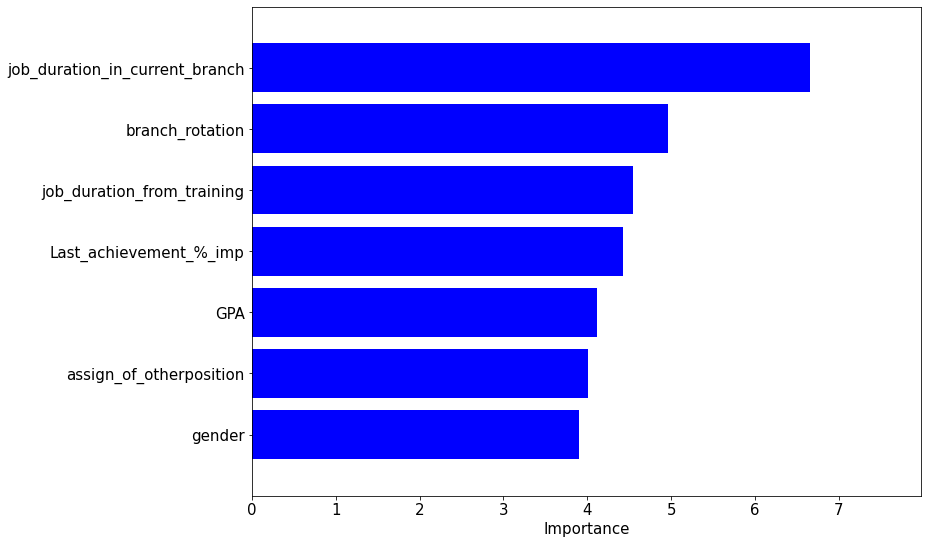

In [50]:
fs = fbooster.get_score(importance_type = 'gain') # available importance types: 'gain', 'cover', 'weight'
imp = sorted([(k, v) for k, v in fs.items()], key = lambda x:x[1], reverse = True)
imp.reverse()

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.barh(range(len(imp)), [v for k, v in imp], color="blue",  align='center')
plt.yticks(range(len(imp)), [k for k, v in imp], fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Importance',fontsize=15)
plt.ylim([-1, len(imp)])
plt.xlim([0, max([v for k, v in imp])*1.2])
plt.show()

In [51]:
col_score1 = 'XGB_SCORE'

data[col_score1] = fxgb_scored
print('Column',col_score1,'with the prediction added/modified. Number of columns:',data.shape[1])

Column XGB_SCORE with the prediction added/modified. Number of columns: 30


In [52]:
from f_pkg.metrics import gini, lift, kolmogorov_smirnov
lift_perc = 10

In [53]:
perf = pd.DataFrame({'sample':[
    'train',
    'valid',
    'test'    
    ], 'XGB_gini':[
    gini(data[train_mask][col_target],data[train_mask][col_score1]) #train
    ,gini(data[valid_mask][col_target],data[valid_mask][col_score1]) #valid
    ,gini(data[test_mask][col_target],data[test_mask][col_score1]) #test
    ], 'XGB_lift'+str(lift_perc):[
    lift(data[train_mask][col_target],-data[train_mask][col_score1],lift_perc) #train
    ,lift(data[valid_mask][col_target],-data[valid_mask][col_score1],lift_perc) #valid
    ,lift(data[test_mask][col_target],-data[test_mask][col_score1],lift_perc) #test
    ], 'XGB_KS':[
    kolmogorov_smirnov(data[train_mask][col_score1],data[train_mask][col_target]) #train
    ,kolmogorov_smirnov(data[valid_mask][col_score1],data[valid_mask][col_target]) #valid
    ,kolmogorov_smirnov(data[test_mask][col_score1],data[test_mask][col_target]) #test
    ]}).set_index('sample')

In [54]:
display(perf)

,XGB_gini,XGB_lift10,XGB_KS
sample,,,
train,0.208,1.820,0.134
valid,0.193,1.594,0.147
test,0.202,1.607,0.154


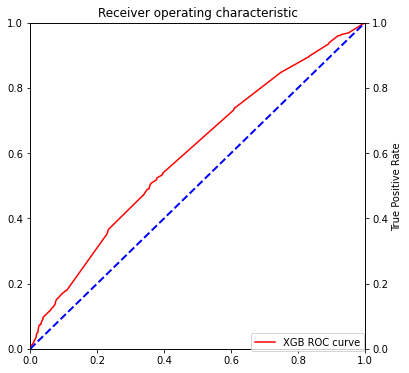

In [55]:
from sklearn.metrics import roc_curve

# Compute ROC curve for each models
fpr = dict()
fpr = dict()
fpr1 = dict()    
tpr1 = dict()

# fpr, tpr, _ = roc_curve(data[valid_mask][col_target], data[valid_mask][col_score])
fpr1, tpr1, _ = roc_curve(data[valid_mask][col_target], data[valid_mask][col_score1])

#Plot of a ROC curve
f, ax1 = plt.subplots(figsize=(6,6))
lw = 2

ax2 = ax1.twinx()
ax2.plot(fpr1, tpr1, color='r',label='XGB ROC curve')
ax2.plot([0, 1], [0, 1], color='b', lw=lw, linestyle='--') 
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver operating characteristic')
# ax1.legend(bbox_to_anchor=(1, 0.1), borderaxespad=0.1)
ax2.legend(bbox_to_anchor=(1, 0.05), borderaxespad=0.1)
plt.show()

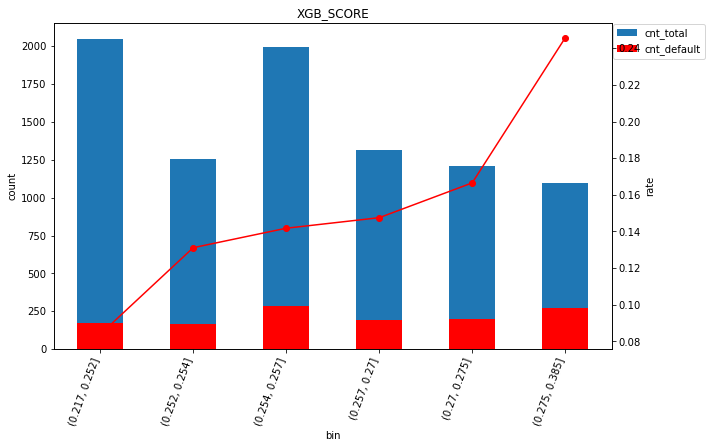

In [56]:
#check linearity

from f_pkg.plots import plot_score_linearity
plot_score_linearity(data[train_mask],
                    col_score=col_score1,
                    col_target=col_target,
                    bins=6)

In [57]:
for i,j in zip(range(len(woe_change)),cols_pred_cat_non):
    test[j].replace(dict(woe_change[i].index),inplace=True)

In [58]:
test.columns

Index(['job_level', 'job_duration_in_current_job_level', 'person_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type', 'gender', 'age',
       'marital_status_maried(Y/N)', 'number_of_dependences',
       'Education_level', 'GPA', 'year_graduated',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal'],
      dtype='object')

In [59]:
test.columns = ['job_level_woe', 'job_duration_in_current_job_level', 'person_level_woe',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'Employee_type_woe', 'gender', 'age',
       'marital_status_maried(Y/N)', 'number_of_dependences',
       'Education_level_woe', 'GPA', 'year_graduated',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Last_achievement_%_imp', 'Achievement_above_100%_during3quartal']

In [60]:
test['marital_status_maried(Y/N)'].replace({'Y':1,'N':0},inplace=True)
test['gender'].replace({1:0,2:1},inplace=True)

In [61]:
dttest_xgb = test[pred_xgb]

In [62]:
fxgbtest_scored = fbooster.predict(xgb.DMatrix(dttest_xgb), ntree_limit=fbooster.best_ntree_limit)

In [63]:
hasil = pd.DataFrame(fxgbtest_scored)
hasil.columns = ['Best Performance']
hasil = hasil.reset_index()

Saving Model

In [64]:
hasil.to_csv('highestscore.csv', index=False)

Note : In this notebook, we did not use any feature engineering to produce new features. However, this result needs more research in order to obtain the best model.